In [1]:
import mediapipe as mp
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

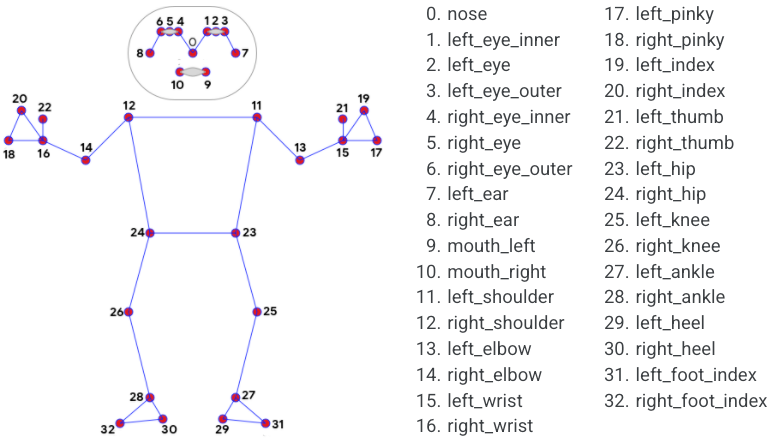

In [3]:
landmark_names = [
        'nose',
        'left_eye_inner',
        'left_eye',
        'left_eye_outer',
        'right_eye_inner',
        'right_eye',
        'right_eye_outer',
        'left_ear',
        'right_ear',
        'mouth_left',
        'mouth_right',
        'left_shoulder',
        'right_shoulder',
        'left_elbow',
        'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]
landmark_list = []
for i in landmark_names:
    for j in ["_x", "_y", "_z"]:
        landmark_list.append(i + j)



In [4]:
results_normalize_points = []
results_real_points = []
#영상
cap = cv2.VideoCapture("test.mp4")
with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            # print("카메라를 찾을 수 없습니다.")
            break

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_height, image_width, _ = image.shape
        results = pose.process(image)
        
        #list생성
        normalize_points = []
        for i in range(len(landmark_names)):
            normalize_points.append(results.pose_world_landmarks.landmark[i].x)
            normalize_points.append(results.pose_world_landmarks.landmark[i].y)
            normalize_points.append(results.pose_world_landmarks.landmark[i].z)
        
        real_points = []
        for i in range(len(landmark_names)):
            real_points.append(results.pose_landmarks.landmark[i].x * image_width)
            real_points.append(results.pose_landmarks.landmark[i].y * image_height)
            real_points.append(results.pose_landmarks.landmark[i].z)
        
        results_normalize_points.append(normalize_points)
        results_real_points.append(real_points)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27:
            break
cv2.destroyAllWindows
cap.release()




normalize 된 듯?


최대한 비슷하게 나오려면...


사람 나온 곳을 crop해서 사용하면 될 것 같긴 하다.

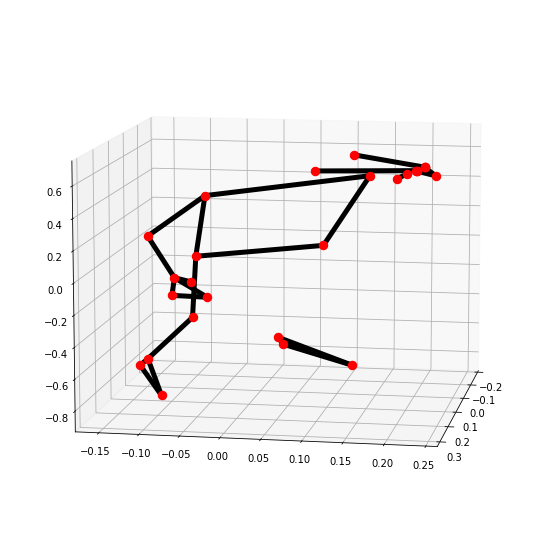

In [5]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [6]:
point_normalize_dataframe = pd.DataFrame(columns = landmark_list, data = results_normalize_points)
point_real_dataframe = pd.DataFrame(columns = landmark_list, data = results_real_points)

In [7]:
point_normalize_dataframe 

nose_x    nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    0.224792 -0.563316 -0.111109          0.212607         -0.608994   
1    0.232311 -0.562894 -0.109001          0.220880         -0.608216   
2    0.238958 -0.562630 -0.108842          0.228203         -0.607737   
3    0.243110 -0.562556 -0.108822          0.232810         -0.607605   
4    0.249614 -0.562556 -0.110062          0.239768         -0.607592   
..        ...       ...       ...               ...               ...   
581  0.248370 -0.542158 -0.077006          0.237770         -0.587833   
582  0.247195 -0.560675 -0.077938          0.234954         -0.606659   
583  0.237967 -0.566157 -0.079042          0.223741         -0.611308   
584  0.235302 -0.570662 -0.092769          0.220077         -0.616279   
585  0.235608 -0.579246 -0.097252          0.220422         -0.624623   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.099602    0.213137   -0.609219   -0.098880          0.213067   
1           -0.097523    0.221321   -0.608435   -0.096786          0.221214   
2           -0.097382    0.228583   -0.607951   -0.096643          0.228457   
3           -0.097349    0.233179   -0.607818   -0.096609          0.233045   
4           -0.098427    0.240128   -0.607806   -0.097682          0.239983   
..                ...         ...         ...         ...               ...   
581         -0.068348    0.237936   -0.587911   -0.067676          0.237966   
582         -0.068878    0.235136   -0.606771   -0.068191          0.235138   
583         -0.069756    0.223930   -0.611390   -0.069050          0.223895   
584         -0.082679    0.220323   -0.616396   -0.081946          0.220218   
585         -0.085970    0.220688   -0.624776   -0.085196          0.220570   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.111239      0.001655      0.788325     -0.007692   
1    ...     0.123500     -0.001511      0.780250      0.012913   
2    ...     0.123127     -0.002351      0.778779      0.015718   
3    ...     0.122784     -0.003796      0.778053      0.020867   
4    ...     0.125054     -0.003632      0.775524      0.029153   
..   ...          ...           ...           ...           ...   
581  ...     0.074452     -0.142362      0.705050     -0.094596   
582  ...     0.069175     -0.149981      0.706503     -0.075059   
583  ...     0.067691     -0.141145      0.711027     -0.051837   
584  ...     0.141195     -0.147067      0.745485     -0.018722   
585  ...     0.175059     -0.151094      0.748645     -0.045327   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0             0.130864           0.829971           0.036747   
1             0.119206           0.821935           0.043641   
2             0.106808           0.816722           0.043418   
3             0.108776           0.816137           0.042404   
4             0.109614           0.814751           0.043183   
..                 ...                ...                ...   
581           0.099751           0.728946          -0.003447   
582           0.100670           0.732613          -0.013353   
583           0.062350           0.755437          -0.019036   
584           0.075168           0.797793           0.058365   
585           0.107887           0.822894           0.096683   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0              0.072739            0.825114           -0.118176  
1              0.074793            0.820848           -0.102222  
2              0.075714            0.818343           -0.100865  
3              0.074714            0.818385           -0.096961  
4              0.074757            0.816387           -0.088541  
..                  ...                 ...                 ...  
581           -0.081234            0.746538           -0.211090  
582           -0.100466            0.749224           -0.196974  
583          

In [8]:
point_normalize_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nose_x              586 non-null    float64
 1   nose_y              586 non-null    float64
 2   nose_z              586 non-null    float64
 3   left_eye_inner_x    586 non-null    float64
 4   left_eye_inner_y    586 non-null    float64
 5   left_eye_inner_z    586 non-null    float64
 6   left_eye_x          586 non-null    float64
 7   left_eye_y          586 non-null    float64
 8   left_eye_z          586 non-null    float64
 9   left_eye_outer_x    586 non-null    float64
 10  left_eye_outer_y    586 non-null    float64
 11  left_eye_outer_z    586 non-null    float64
 12  right_eye_inner_x   586 non-null    float64
 13  right_eye_inner_y   586 non-null    float64
 14  right_eye_inner_z   586 non-null    float64
 15  right_eye_x         586 non-null    float64
 16  right_ey

In [9]:
point_normalize_dataframe 

nose_x    nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    0.224792 -0.563316 -0.111109          0.212607         -0.608994   
1    0.232311 -0.562894 -0.109001          0.220880         -0.608216   
2    0.238958 -0.562630 -0.108842          0.228203         -0.607737   
3    0.243110 -0.562556 -0.108822          0.232810         -0.607605   
4    0.249614 -0.562556 -0.110062          0.239768         -0.607592   
..        ...       ...       ...               ...               ...   
581  0.248370 -0.542158 -0.077006          0.237770         -0.587833   
582  0.247195 -0.560675 -0.077938          0.234954         -0.606659   
583  0.237967 -0.566157 -0.079042          0.223741         -0.611308   
584  0.235302 -0.570662 -0.092769          0.220077         -0.616279   
585  0.235608 -0.579246 -0.097252          0.220422         -0.624623   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.099602    0.213137   -0.609219   -0.098880          0.213067   
1           -0.097523    0.221321   -0.608435   -0.096786          0.221214   
2           -0.097382    0.228583   -0.607951   -0.096643          0.228457   
3           -0.097349    0.233179   -0.607818   -0.096609          0.233045   
4           -0.098427    0.240128   -0.607806   -0.097682          0.239983   
..                ...         ...         ...         ...               ...   
581         -0.068348    0.237936   -0.587911   -0.067676          0.237966   
582         -0.068878    0.235136   -0.606771   -0.068191          0.235138   
583         -0.069756    0.223930   -0.611390   -0.069050          0.223895   
584         -0.082679    0.220323   -0.616396   -0.081946          0.220218   
585         -0.085970    0.220688   -0.624776   -0.085196          0.220570   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.111239      0.001655      0.788325     -0.007692   
1    ...     0.123500     -0.001511      0.780250      0.012913   
2    ...     0.123127     -0.002351      0.778779      0.015718   
3    ...     0.122784     -0.003796      0.778053      0.020867   
4    ...     0.125054     -0.003632      0.775524      0.029153   
..   ...          ...           ...           ...           ...   
581  ...     0.074452     -0.142362      0.705050     -0.094596   
582  ...     0.069175     -0.149981      0.706503     -0.075059   
583  ...     0.067691     -0.141145      0.711027     -0.051837   
584  ...     0.141195     -0.147067      0.745485     -0.018722   
585  ...     0.175059     -0.151094      0.748645     -0.045327   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0             0.130864           0.829971           0.036747   
1             0.119206           0.821935           0.043641   
2             0.106808           0.816722           0.043418   
3             0.108776           0.816137           0.042404   
4             0.109614           0.814751           0.043183   
..                 ...                ...                ...   
581           0.099751           0.728946          -0.003447   
582           0.100670           0.732613          -0.013353   
583           0.062350           0.755437          -0.019036   
584           0.075168           0.797793           0.058365   
585           0.107887           0.822894           0.096683   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0              0.072739            0.825114           -0.118176  
1              0.074793            0.820848           -0.102222  
2              0.075714            0.818343           -0.100865  
3              0.074714            0.818385           -0.096961  
4              0.074757            0.816387           -0.088541  
..                  ...                 ...                 ...  
581           -0.081234            0.746538           -0.211090  
582           -0.100466            0.749224           -0.196974  
583          

In [10]:
point_real_dataframe

nose_x     nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    212.878418  43.629946 -0.124098        213.058126         37.616211   
1    212.822288  43.733810 -0.122265        213.059074         37.653293   
2    212.793821  43.787422 -0.122634        213.067746         37.666787   
3    212.792999  43.787121 -0.123684        213.093477         37.661937   
4    212.807930  43.745826 -0.129937        213.150859         37.583942   
..          ...        ...       ...               ...               ...   
581  476.070392  46.979674 -0.123555        475.021648         39.119026   
582  477.120173  46.150453 -0.112423        476.218164         38.584996   
583  476.018965  46.350621 -0.112302        475.339794         38.651817   
584  476.260829  45.324456 -0.123916        475.806069         38.447208   
585  477.445436  43.123073 -0.123379        476.557696         36.746196   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.106702  213.325506   37.978073   -0.106721        213.541156   
1           -0.104944  213.332516   37.998576   -0.104969        213.564831   
2           -0.105414  213.351434   38.006363   -0.105440        213.602436   
3           -0.106411  213.390809   37.998694   -0.106439        213.663125   
4           -0.112249  213.458920   37.907700   -0.112279        213.747025   
..                ...         ...         ...         ...               ...   
581         -0.106791  474.216950   38.722142   -0.106836        473.249674   
582         -0.094034  475.581837   38.329727   -0.094078        474.813795   
583         -0.094650  474.745524   38.419949   -0.094696        474.035418   
584         -0.107823  475.383031   38.308457   -0.107857        474.840117   
585         -0.106440  476.275706   36.838172   -0.106480        475.871015   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.152576    156.351489    316.820555     -0.012270   
1    ...     0.171906    155.406654    316.756074      0.032851   
2    ...     0.170170    155.281591    316.721399      0.027240   
3    ...     0.169070    154.848665    316.720862      0.032802   
4    ...     0.180933    154.819769    316.721957      0.042697   
..   ...          ...           ...           ...           ...   
581  ...     0.121349    393.092036    321.863580     -0.101389   
582  ...     0.098943    393.108988    322.254946     -0.095317   
583  ...     0.103126    395.534635    321.355934     -0.067621   
584  ...     0.205096    395.078051    320.331502     -0.021139   
585  ...     0.236078    394.926488    318.418765     -0.104430   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0           192.776710         318.611734           0.066828   
1           192.285401         318.362203           0.081727   
2           189.953828         318.359070           0.079242   
3           189.982635         318.369198           0.077681   
4           189.975518         318.451874           0.087181   
..                 ...                ...                ...   
581         448.600245         317.503059           0.026046   
582         449.590015         318.063877          -0.009449   
583         447.551644         324.680822          -0.005165   
584         450.472426         324.377646           0.112966   
585         457.992232         323.876588           0.144906   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0            182.247591          318.261867           -0.126674  
1            184.105450          318.279998           -0.083208  
2            184.696591          318.349907           -0.091454  
3            183.264220          326.565793           -0.087423  
4            182.466620          328.623970           -0.078201  
..                  ...                 ...                 ...  
581          415.956652          334.974003           -0.225091  
582          413.470781          335.003207  

C:\Users\Lee-PC\AppData\Local\Temp\ipykernel_3960\3441360602.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


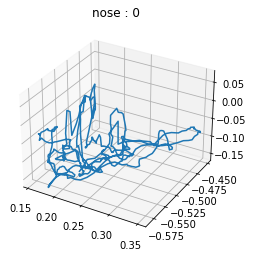

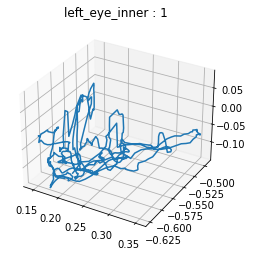

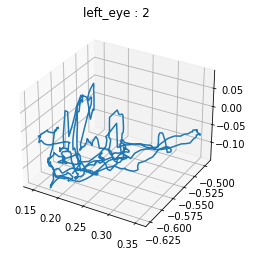

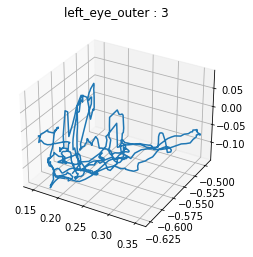

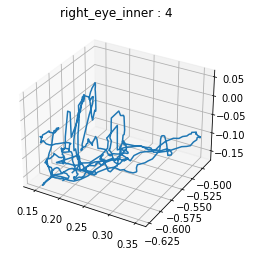

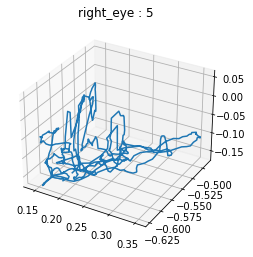

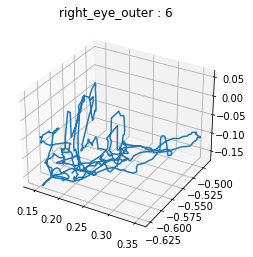

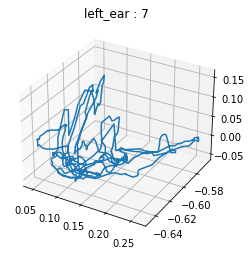

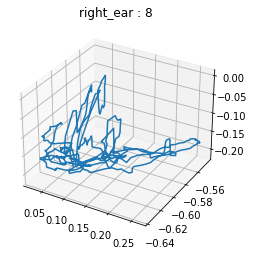

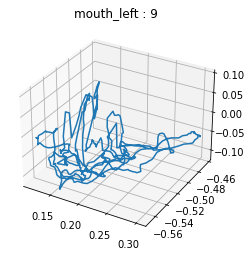

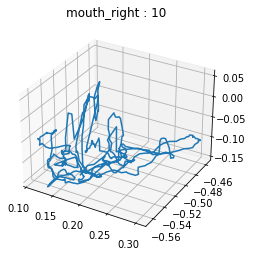

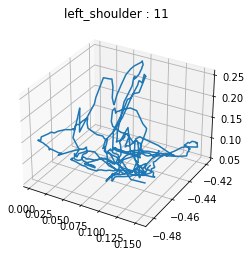

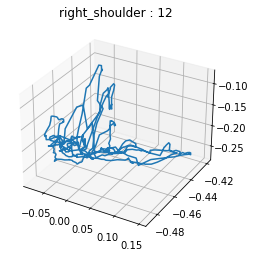

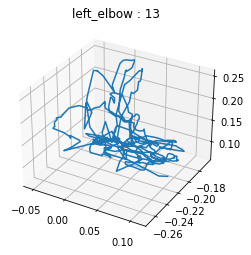

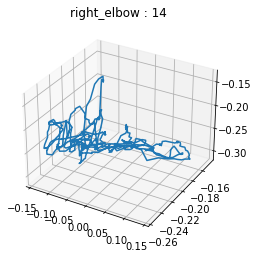

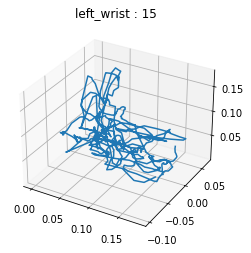

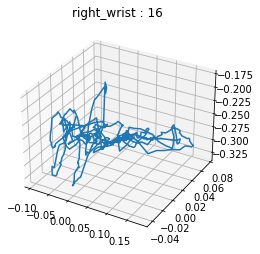

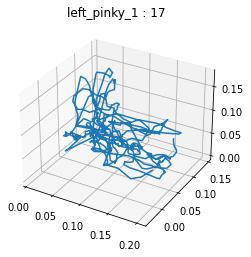

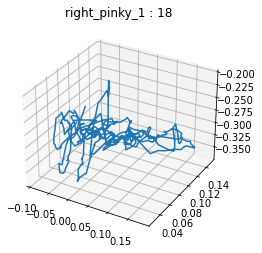

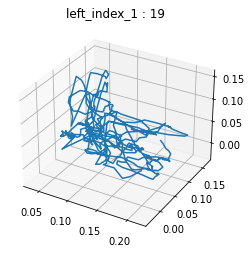

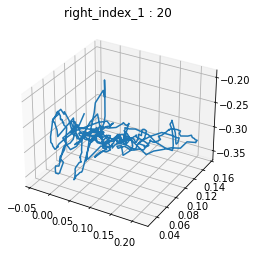

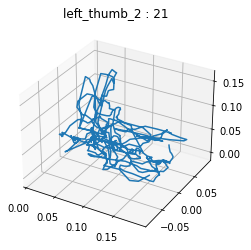

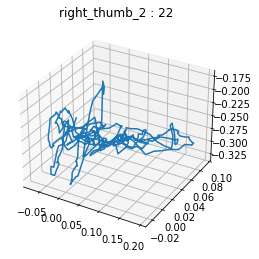

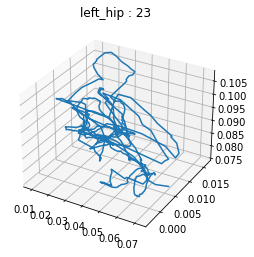

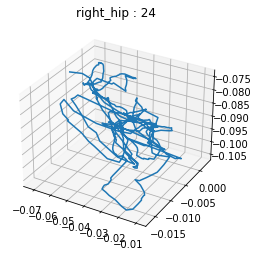

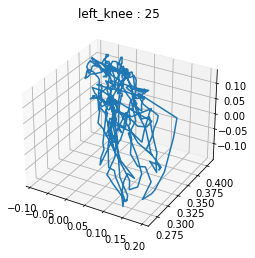

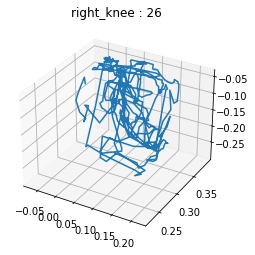

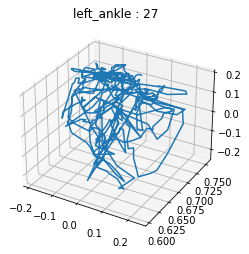

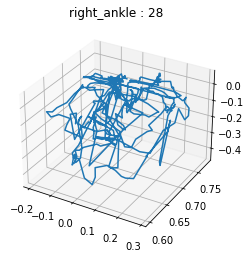

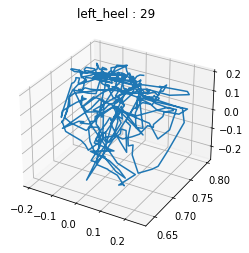

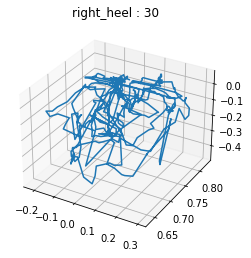

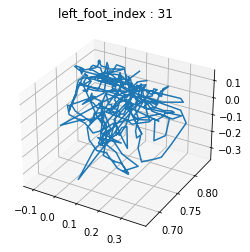

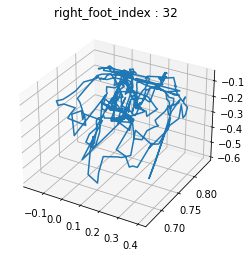

In [11]:
for i in range(len(landmark_names)):
    fig = plt.figure()
    
    ax_1 = plt.axes(projection='3d')
    plt.title(landmark_names[i] + " : " + str(i))
    x = point_normalize_dataframe[landmark_list[i*3]] 
    y = point_normalize_dataframe[landmark_list[i*3+1]]
    z = point_normalize_dataframe[landmark_list[i*3+2]]
    ax_1.plot(x,y,z)


   

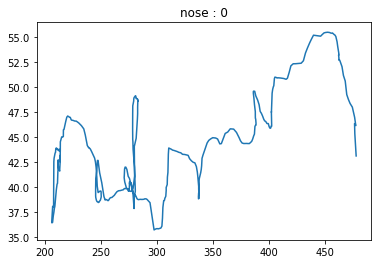

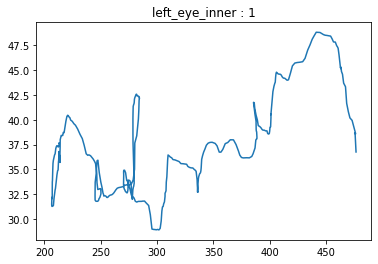

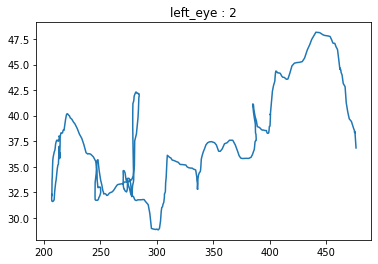

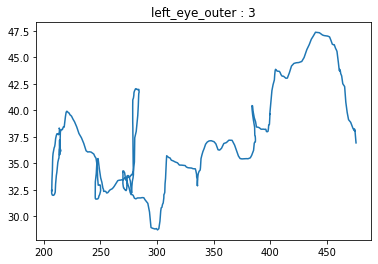

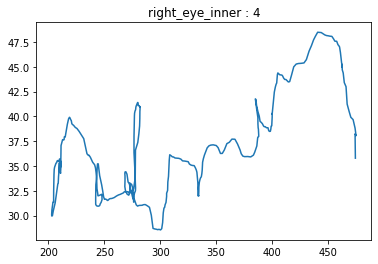

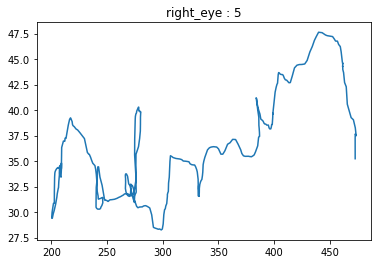

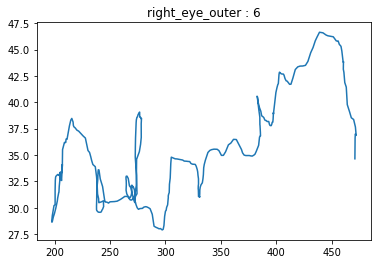

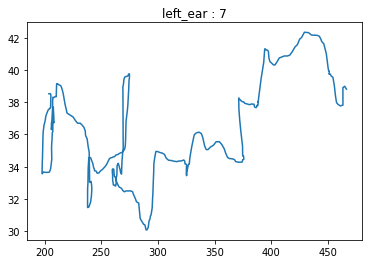

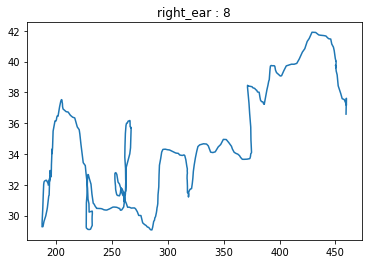

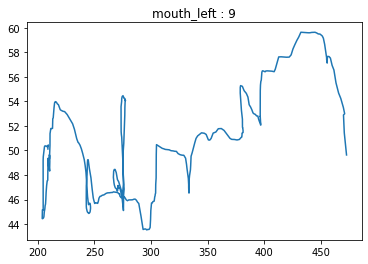

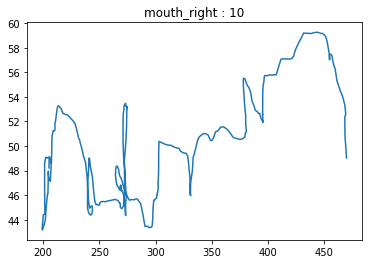

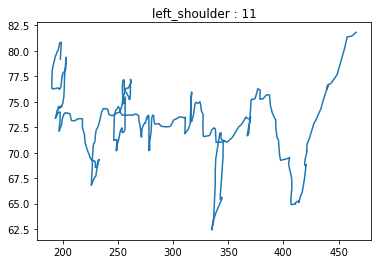

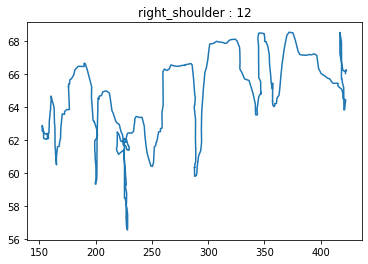

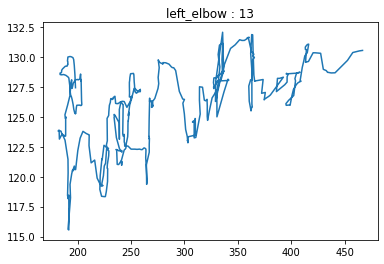

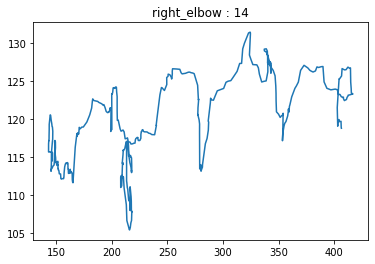

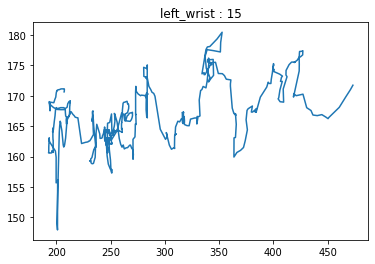

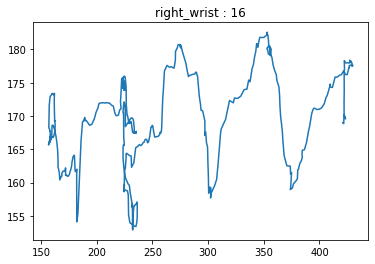

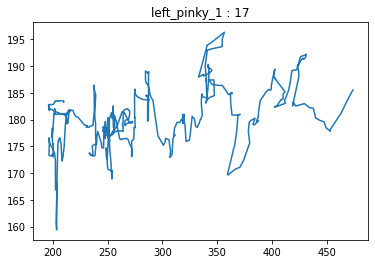

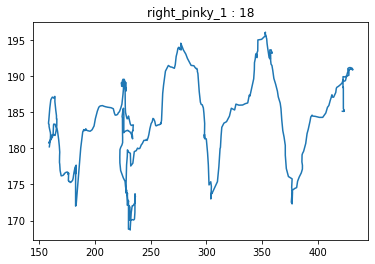

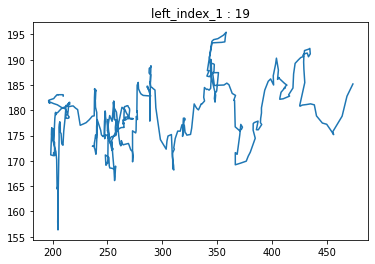

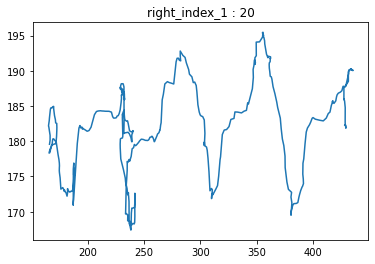

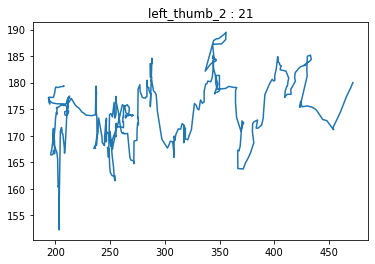

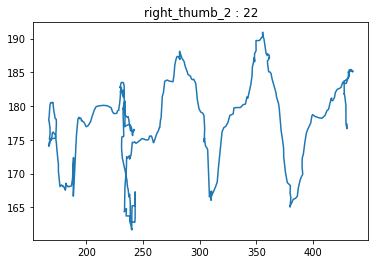

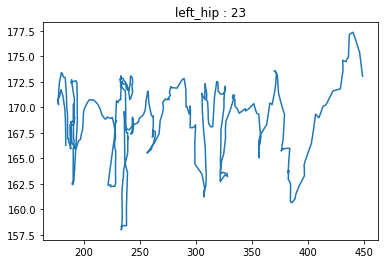

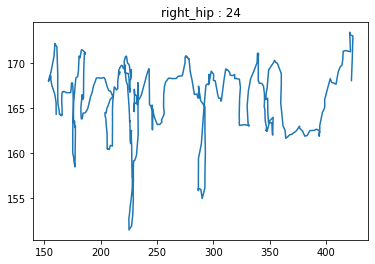

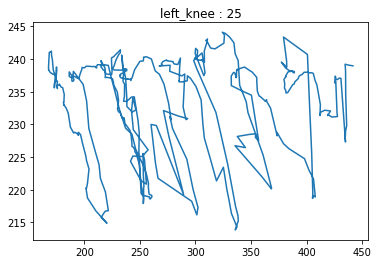

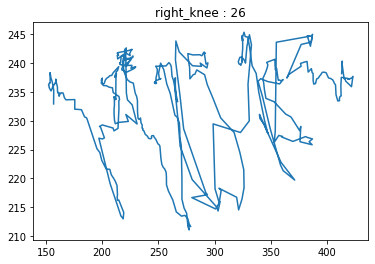

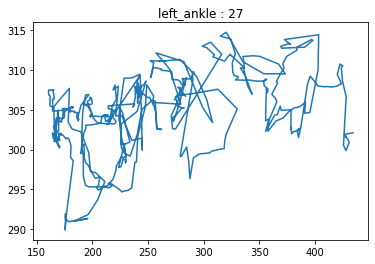

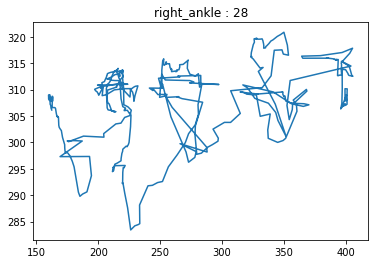

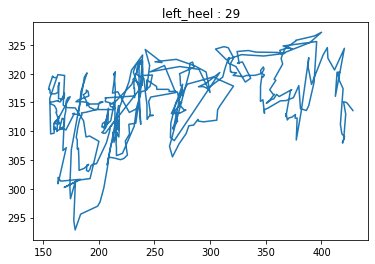

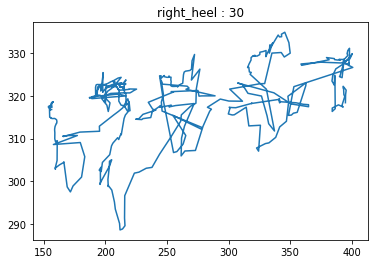

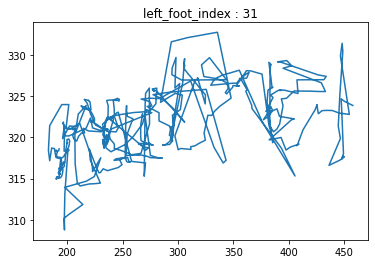

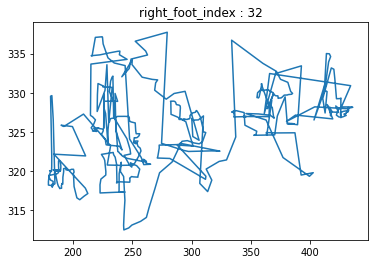

In [12]:
for i in range(len(landmark_names)):

    plt.title(landmark_names[i] + " : " + str(i))
    x = point_real_dataframe[landmark_list[i*3]] 
    y = point_real_dataframe[landmark_list[i*3+1]]

    plt.plot(x,y)
    plt.show()

In [13]:
point_normalize_dataframe.to_csv("point_normalize.csv", mode = 'w', index = False)
point_real_dataframe.to_csv("point_real.csv", mode = 'w', index = False)

## Hemiplegic Gait 
* https://www.youtube.com/watch?v=ihz74Zv6D84
* https://www.youtube.com/watch?v=y160w4sAQNw&list=PLD74972DCFB2D58C8

## Diplegic Gait
* https://www.youtube.com/watch?v=eLuxTFHoZAA&list=PLD74972DCFB2D58C8&index=2
* 

In [14]:
point_normalize_dataframe

nose_x    nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0    0.224792 -0.563316 -0.111109          0.212607         -0.608994   
1    0.232311 -0.562894 -0.109001          0.220880         -0.608216   
2    0.238958 -0.562630 -0.108842          0.228203         -0.607737   
3    0.243110 -0.562556 -0.108822          0.232810         -0.607605   
4    0.249614 -0.562556 -0.110062          0.239768         -0.607592   
..        ...       ...       ...               ...               ...   
581  0.248370 -0.542158 -0.077006          0.237770         -0.587833   
582  0.247195 -0.560675 -0.077938          0.234954         -0.606659   
583  0.237967 -0.566157 -0.079042          0.223741         -0.611308   
584  0.235302 -0.570662 -0.092769          0.220077         -0.616279   
585  0.235608 -0.579246 -0.097252          0.220422         -0.624623   

     left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  left_eye_outer_x  \
0           -0.099602    0.213137   -0.609219   -0.098880          0.213067   
1           -0.097523    0.221321   -0.608435   -0.096786          0.221214   
2           -0.097382    0.228583   -0.607951   -0.096643          0.228457   
3           -0.097349    0.233179   -0.607818   -0.096609          0.233045   
4           -0.098427    0.240128   -0.607806   -0.097682          0.239983   
..                ...         ...         ...         ...               ...   
581         -0.068348    0.237936   -0.587911   -0.067676          0.237966   
582         -0.068878    0.235136   -0.606771   -0.068191          0.235138   
583         -0.069756    0.223930   -0.611390   -0.069050          0.223895   
584         -0.082679    0.220323   -0.616396   -0.081946          0.220218   
585         -0.085970    0.220688   -0.624776   -0.085196          0.220570   

     ...  left_heel_z  right_heel_x  right_heel_y  right_heel_z  \
0    ...     0.111239      0.001655      0.788325     -0.007692   
1    ...     0.123500     -0.001511      0.780250      0.012913   
2    ...     0.123127     -0.002351      0.778779      0.015718   
3    ...     0.122784     -0.003796      0.778053      0.020867   
4    ...     0.125054     -0.003632      0.775524      0.029153   
..   ...          ...           ...           ...           ...   
581  ...     0.074452     -0.142362      0.705050     -0.094596   
582  ...     0.069175     -0.149981      0.706503     -0.075059   
583  ...     0.067691     -0.141145      0.711027     -0.051837   
584  ...     0.141195     -0.147067      0.745485     -0.018722   
585  ...     0.175059     -0.151094      0.748645     -0.045327   

     left_foot_index_x  left_foot_index_y  left_foot_index_z  \
0             0.130864           0.829971           0.036747   
1             0.119206           0.821935           0.043641   
2             0.106808           0.816722           0.043418   
3             0.108776           0.816137           0.042404   
4             0.109614           0.814751           0.043183   
..                 ...                ...                ...   
581           0.099751           0.728946          -0.003447   
582           0.100670           0.732613          -0.013353   
583           0.062350           0.755437          -0.019036   
584           0.075168           0.797793           0.058365   
585           0.107887           0.822894           0.096683   

     right_foot_index_x  right_foot_index_y  right_foot_index_z  
0              0.072739            0.825114           -0.118176  
1              0.074793            0.820848           -0.102222  
2              0.075714            0.818343           -0.100865  
3              0.074714            0.818385           -0.096961  
4              0.074757            0.816387           -0.088541  
..                  ...                 ...                 ...  
581           -0.081234            0.746538           -0.211090  
582           -0.100466            0.749224           -0.196974  
583          

In [15]:
side_view = point_normalize_dataframe.loc[138]

In [16]:
side_view

nose_x                0.188777
nose_y               -0.562053
nose_z               -0.100767
left_eye_inner_x      0.182178
left_eye_inner_y     -0.605566
                        ...   
left_foot_index_y     0.786505
left_foot_index_z     0.105336
right_foot_index_x    0.206509
right_foot_index_y    0.794027
right_foot_index_z   -0.110300
Name: 138, Length: 99, dtype: float64

In [17]:
nose = 0
left_eye = 2
right_eye = 5
left_ear = 7
right_ear = 8
left_shoulder = 11
right_shoulder = 12


[2.2479233145713806, -1.1110925674438477, -0.9960159659385681, -6.092185378074646, -0.9960159659385681, -0.9890976548194885, 2.0252352952957153]
[-1.1110925674438477, -6.089937686920166, -6.092185378074646, 2.1306709945201874, -6.092185378074646, -6.038531064987183, -1.291658878326416]


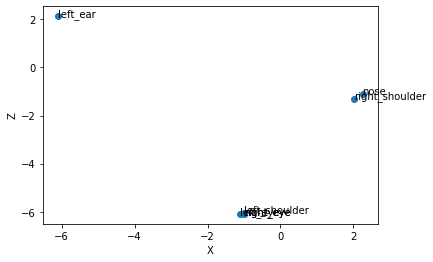

[2.3231109976768494, -1.0900110006332397, -0.9752273559570312, -6.084349751472473, -0.9752273559570312, -0.9681167453527451, 2.1258805692195892]
[-1.0900110006332397, -6.08215868473053, -6.084349751472473, 2.2121377289295197, -6.084349751472473, -6.030275225639343, -1.2761655449867249]


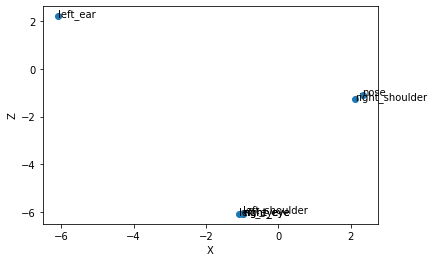

[2.389575242996216, -1.0884221643209457, -0.9738204628229141, -6.079508662223816, -0.9738204628229141, -0.9666919708251953, 2.2042539715766907]
[-1.0884221643209457, -6.077370047569275, -6.079508662223816, 2.284574508666992, -6.079508662223816, -6.0258060693740845, -1.2757156789302826]


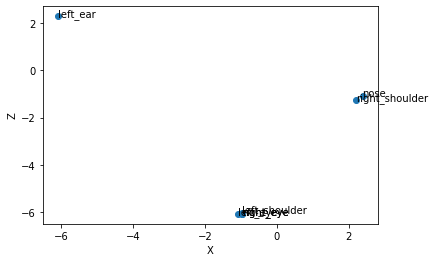

[2.431097775697708, -1.0882245004177094, -0.9734872728586197, -6.078184247016907, -0.9734872728586197, -0.9663601219654083, 2.249058783054352]
[-1.0882245004177094, -6.076045036315918, -6.078184247016907, 2.330445498228073, -6.078184247016907, -6.024957299232483, -1.2755581736564636]


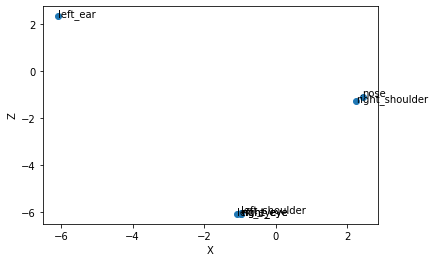

[2.496142238378525, -1.1006228625774384, -0.9842667728662491, -6.078064441680908, -0.9842667728662491, -0.9771107137203217, 2.3141486942768097]
[-1.1006228625774384, -6.075917482376099, -6.078064441680908, 2.3998282849788666, -6.078064441680908, -6.025028824806213, -1.2871269881725311]


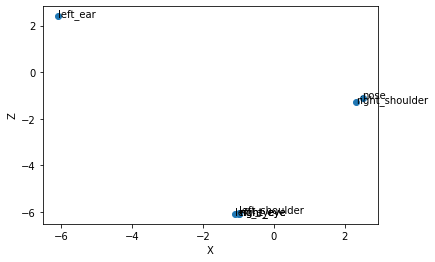

[2.5235283374786377, -1.0999061912298203, -0.9838691353797913, -6.073993444442749, -0.9838691353797913, -0.9767316281795502, 2.3432430624961853]
[-1.0999061912298203, -6.071888208389282, -6.073993444442749, 2.42424413561821, -6.073993444442749, -6.0204994678497314, -1.2871098518371582]


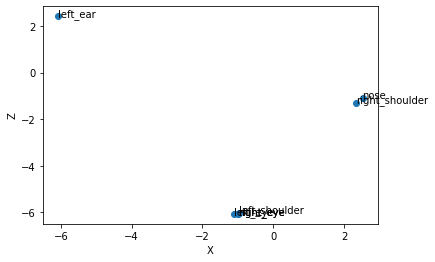

[2.533917725086212, -1.1029071360826492, -0.9882630407810211, -6.055225729942322, -0.9882630407810211, -0.9812109917402267, 2.35442653298378]
[-1.1029071360826492, -6.053214073181152, -6.055225729942322, 2.432411164045334, -6.055225729942322, -6.000161170959473, -1.2941394746303558]


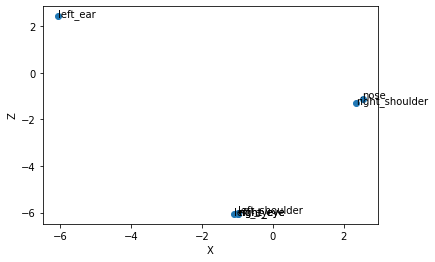

[2.5283873081207275, -1.102076694369316, -0.9879860281944275, -6.033534407615662, -0.9879860281944275, -0.9809577465057373, 2.349269837141037]
[-1.102076694369316, -6.031557321548462, -6.033534407615662, 2.4274519085884094, -6.033534407615662, -5.978493690490723, -1.2941285967826843]


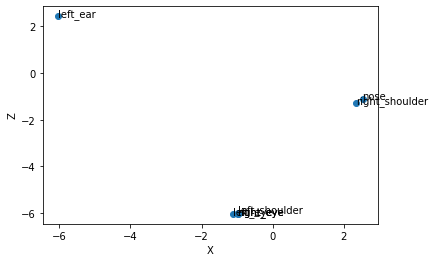

[2.540423572063446, -1.1024930328130722, -0.9888234734535217, -6.009687185287476, -0.9888234734535217, -0.9818459302186966, 2.3640160262584686]
[-1.1024930328130722, -6.007813215255737, -6.009687185287476, 2.440287619829178, -6.009687185287476, -5.953420996665955, -1.2960542738437653]


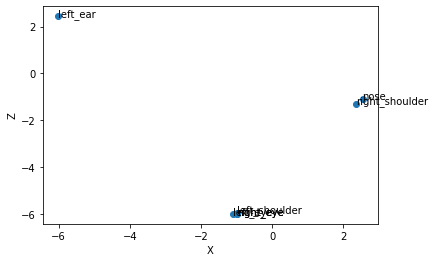

[2.543323338031769, -1.1647092550992966, -1.0504291951656342, -6.000247001647949, -1.0504291951656342, -1.0437873005867004, 2.3616738617420197]
[-1.1647092550992966, -5.9983086585998535, -6.000247001647949, 2.4410952627658844, -6.000247001647949, -5.944027900695801, -1.3589365780353546]


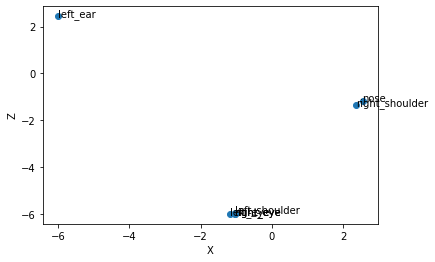

[2.5547701120376587, -1.1765163391828537, -1.0634884983301163, -5.995609164237976, -1.0634884983301163, -1.0568980872631073, 2.371641844511032]
[-1.1765163391828537, -5.9936463832855225, -5.995609164237976, 2.452280968427658, -5.995609164237976, -5.939115881919861, -1.372630000114441]


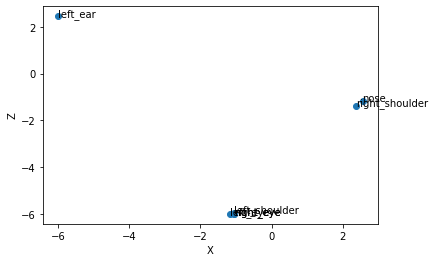

[2.553401291370392, -1.1831160634756088, -1.0714641213417053, -5.993280410766602, -1.0714641213417053, -1.0649608075618744, 2.370986193418503]
[-1.1831160634756088, -5.991281270980835, -5.993280410766602, 2.4526306986808777, -5.993280410766602, -5.937104821205139, -1.3791219890117645]


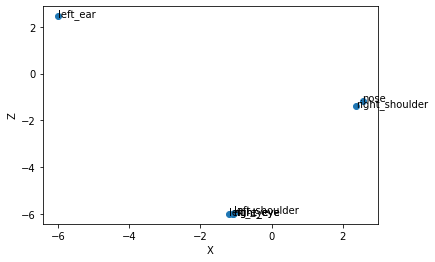

[2.5432056188583374, -1.20597243309021, -1.0971806943416595, -5.990419387817383, -1.0971806943416595, -1.0908515006303787, 2.36247181892395]
[-1.20597243309021, -5.988425016403198, -5.990419387817383, 2.44614377617836, -5.990419387817383, -5.935239195823669, -1.4030969142913818]


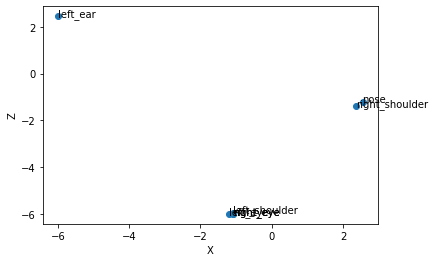

[2.5019362568855286, -1.2410230934619904, -1.1355221271514893, -5.984405279159546, -1.1355221271514893, -1.1291664838790894, 2.328896075487137]
[-1.2410230934619904, -5.982417464256287, -5.984405279159546, 2.416672110557556, -5.984405279159546, -5.9314340353012085, -1.4380179345607758]


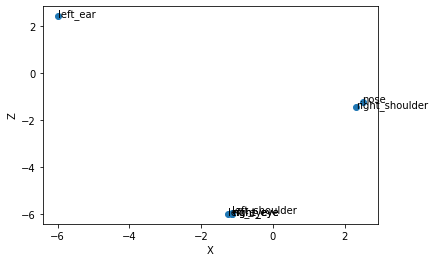

[2.4423953890800476, -1.2516207993030548, -1.1478009074926376, -5.982916355133057, -1.1478009074926376, -1.141480877995491, 2.2786977887153625]
[-1.2516207993030548, -5.980966091156006, -5.982916355133057, 2.368776351213455, -5.982916355133057, -5.931264758110046, -1.4486852288246155]


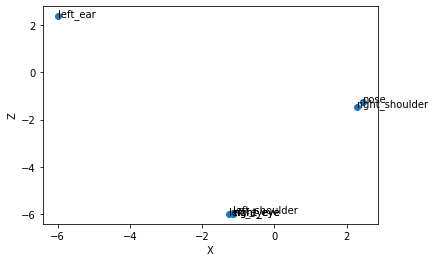

[2.3913441598415375, -1.250230073928833, -1.1465741693973541, -5.983235836029053, -1.1465741693973541, -1.140221282839775, 2.2229458391666412]
[-1.250230073928833, -5.981289744377136, -5.983235836029053, 2.3127520084381104, -5.983235836029053, -5.9318602085113525, -1.4477872848510742]


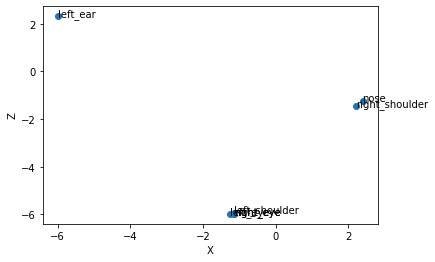

[2.3689939081668854, -1.2481540441513062, -1.1457209289073944, -5.972910523414612, -1.1457209289073944, -1.1394035816192627, 2.202943116426468]
[-1.2481540441513062, -5.970966815948486, -5.972910523414612, 2.2899825870990753, -5.972910523414612, -5.92201292514801, -1.4464770257472992]


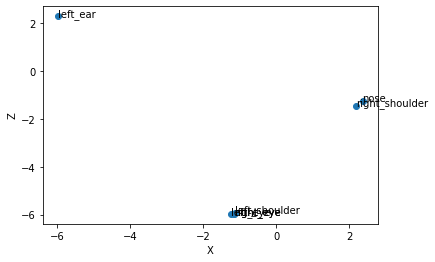

[2.364615499973297, -1.246778815984726, -1.1438924819231033, -5.970568060874939, -1.1438924819231033, -1.1375530809164047, 2.197606712579727]
[-1.246778815984726, -5.968679189682007, -5.970568060874939, 2.2820882499217987, -5.970568060874939, -5.919285416603088, -1.4454498887062073]


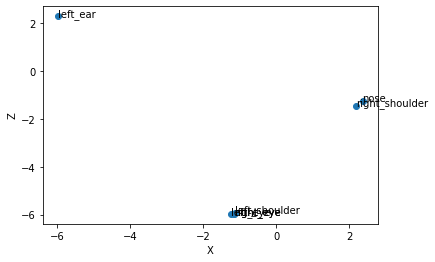

[2.341293692588806, -1.215711310505867, -1.1171060800552368, -5.970084071159363, -1.1171060800552368, -1.1107896268367767, 2.1798494458198547]
[-1.215711310505867, -5.968233942985535, -5.970084071159363, 2.25669264793396, -5.970084071159363, -5.918492674827576, -1.4234252274036407]


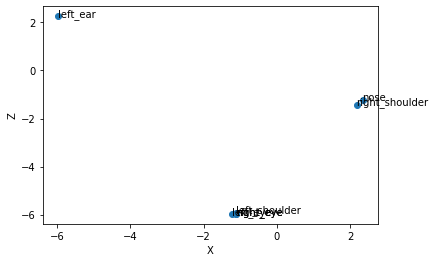

[2.335934191942215, -1.1915693432092667, -1.096796691417694, -5.973873138427734, -1.096796691417694, -1.0904865711927414, 2.171677201986313]
[-1.1915693432092667, -5.972118377685547, -5.973873138427734, 2.2431276738643646, -5.973873138427734, -5.920403599739075, -1.4078433811664581]


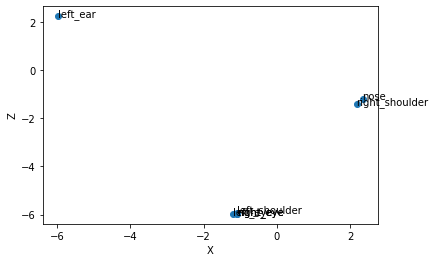

[2.3261581361293793, -1.1913064867258072, -1.0966014117002487, -5.981602668762207, -1.0966014117002487, -1.0902892798185349, 2.1561099588871]
[-1.1913064867258072, -5.979979038238525, -5.981602668762207, 2.2229543328285217, -5.981602668762207, -5.925512909889221, -1.408187448978424]


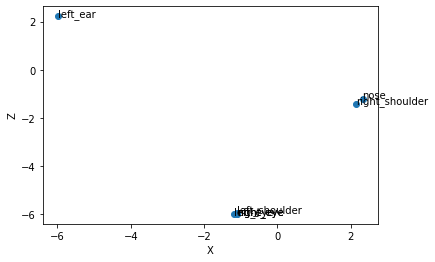

[2.2835224866867065, -1.18952177464962, -1.0956480354070663, -5.984973311424255, -1.0956480354070663, -1.0893170535564423, 2.1142087876796722]
[-1.18952177464962, -5.983414649963379, -5.984973311424255, 2.1747425198554993, -5.984973311424255, -5.927684903144836, -1.4079658687114716]


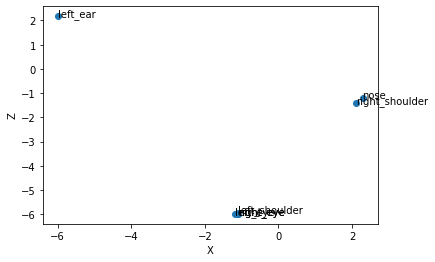

[2.2458356618881226, -1.1890776455402374, -1.0954008996486664, -5.988963842391968, -1.0954008996486664, -1.0890605300664902, 2.0731669664382935]
[-1.1890776455402374, -5.987496376037598, -5.988963842391968, 2.1329574286937714, -5.988963842391968, -5.930487513542175, -1.4078760147094727]


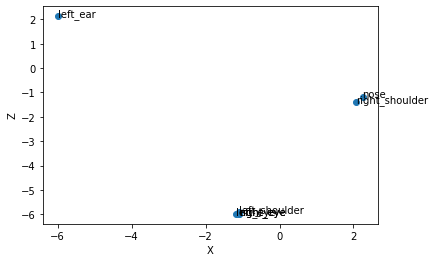

[2.1861758828163147, -1.1889196187257767, -1.0952040553092957, -6.0049521923065186, -1.0952040553092957, -1.0888512432575226, 2.001599669456482]
[-1.1889196187257767, -6.00370466709137, -6.0049521923065186, 2.063393294811249, -6.0049521923065186, -5.944105386734009, -1.4077691733837128]


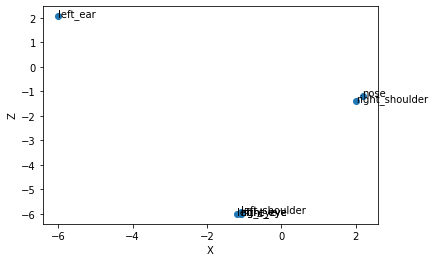

[2.13341623544693, -1.1913304030895233, -1.0971930623054504, -6.013579964637756, -1.0971930623054504, -1.0908642411231995, 1.943134367465973]
[-1.1913304030895233, -6.012350916862488, -6.013579964637756, 2.009015828371048, -6.013579964637756, -5.951129198074341, -1.4102520048618317]


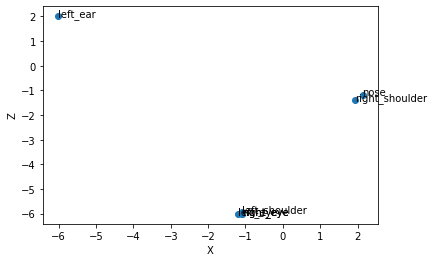

[2.0858101546764374, -1.198224350810051, -1.103658527135849, -6.015762090682983, -1.103658527135849, -1.0973597317934036, 1.894664466381073]
[-1.198224350810051, -6.014515161514282, -6.015762090682983, 1.965615153312683, -6.015762090682983, -5.953112244606018, -1.4161796867847443]


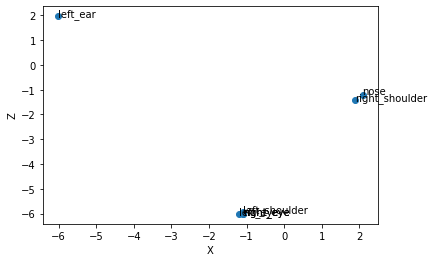

[2.061600238084793, -1.19939424097538, -1.1042016744613647, -6.047319173812866, -1.1042016744613647, -1.0979058593511581, 1.8574804067611694]
[-1.19939424097538, -6.045944690704346, -6.047319173812866, 1.932452917098999, -6.047319173812866, -5.983786582946777, -1.416541337966919]


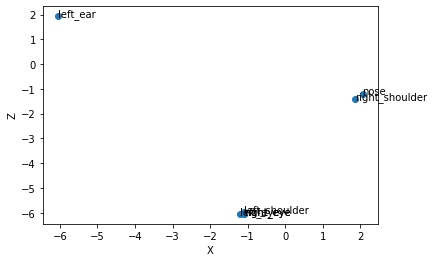

[2.0425529778003693, -1.2252984941005707, -1.1266875267028809, -6.089679598808289, -1.1266875267028809, -1.1204811930656433, 1.826777309179306]
[-1.2252984941005707, -6.088158488273621, -6.089679598808289, 1.9054743647575378, -6.089679598808289, -6.025976538658142, -1.4373765885829926]


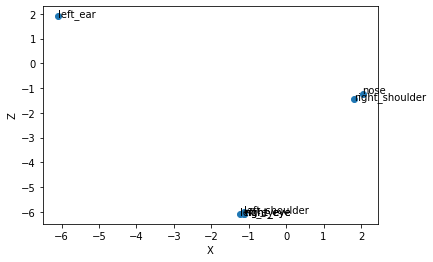

[2.0386607944965363, -1.2267038226127625, -1.1270906031131744, -6.135331988334656, -1.1270906031131744, -1.120905727148056, 1.8119615316390991]
[-1.2267038226127625, -6.13379180431366, -6.135331988334656, 1.8923832476139069, -6.135331988334656, -6.0702210664749146, -1.4379547536373138]


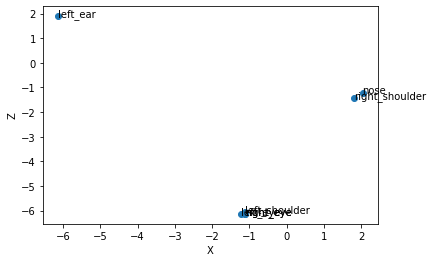

[2.0258189737796783, -1.2181277573108673, -1.115700677037239, -6.144994497299194, -1.115700677037239, -1.109611764550209, 1.7991968989372253]
[-1.2181277573108673, -6.143433451652527, -6.144994497299194, 1.8805517256259918, -6.144994497299194, -6.081461310386658, -1.4260151982307434]


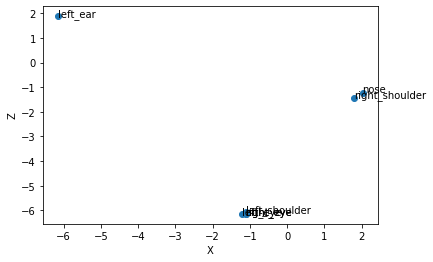

[2.017211467027664, -1.0776237398386002, -0.963260680437088, -6.18378758430481, -0.963260680437088, -0.9572108834981918, 1.7894776165485382]
[-1.0776237398386002, -6.18202805519104, -6.18378758430481, 1.8719364702701569, -6.18378758430481, -6.12030029296875, -1.266615092754364]


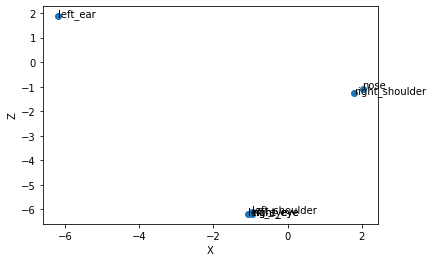

[2.009684592485428, -1.037668064236641, -0.9210629761219025, -6.210337281227112, -0.9210629761219025, -0.9149637818336487, 1.7790859937667847]
[-1.037668064236641, -6.208397746086121, -6.210337281227112, 1.8619415163993835, -6.210337281227112, -6.146036982536316, -1.2227080762386322]


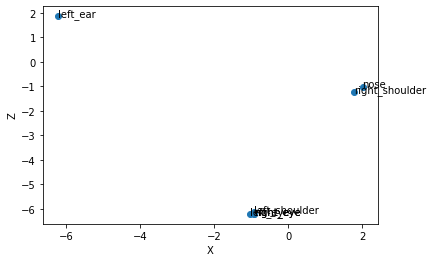

[2.0076362788677216, -1.029772087931633, -0.912591814994812, -6.2337929010391235, -0.912591814994812, -0.9064838290214539, 1.7763254046440125]
[-1.029772087931633, -6.23175323009491, -6.2337929010391235, 1.8597312271595001, -6.2337929010391235, -6.1691248416900635, -1.2130959331989288]


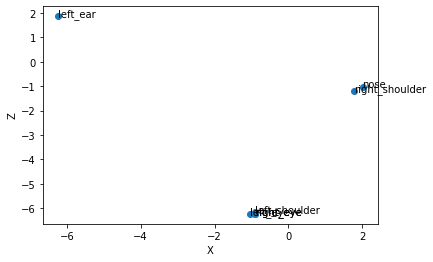

[1.987706571817398, -1.0370026528835297, -0.9213631600141525, -6.242316365242004, -0.9213631600141525, -0.9152454882860184, 1.7569760978221893]
[-1.0370026528835297, -6.240229606628418, -6.242316365242004, 1.844220906496048, -6.242316365242004, -6.178972125053406, -1.2227681279182434]


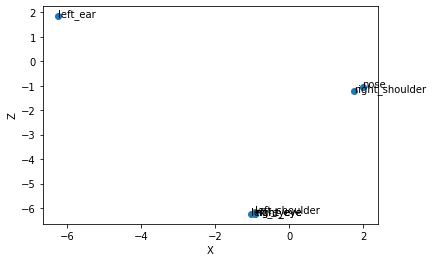

[1.9667060673236847, -1.0960841178894043, -0.9786806255578995, -6.240466833114624, -0.9786806255578995, -0.9724994748830795, 1.739460527896881]
[-1.0960841178894043, -6.238383650779724, -6.240466833114624, 1.8312498927116394, -6.240466833114624, -6.178336143493652, -1.2719547748565674]


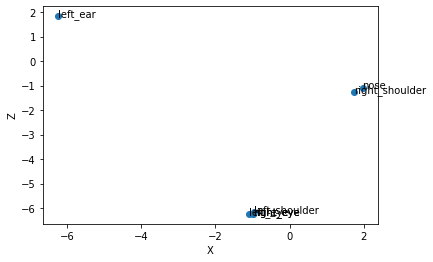

[1.9518017768859863, -1.1116720736026764, -0.9944795817136765, -6.246082186698914, -0.9944795817136765, -0.9881321340799332, 1.7237797379493713]
[-1.1116720736026764, -6.244009733200073, -6.246082186698914, 1.8176430463790894, -6.246082186698914, -6.185104846954346, -1.2842132151126862]


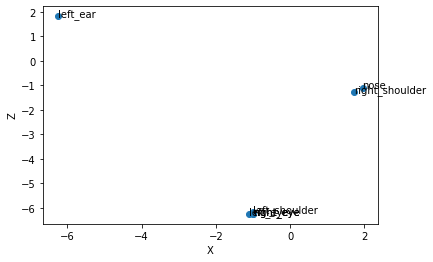

[1.941324770450592, -1.166805922985077, -1.0482294112443924, -6.2440115213394165, -1.0482294112443924, -1.0417427122592926, 1.7131826281547546]
[-1.166805922985077, -6.241950988769531, -6.2440115213394165, 1.8100322782993317, -6.2440115213394165, -6.183090806007385, -1.3347281515598297]


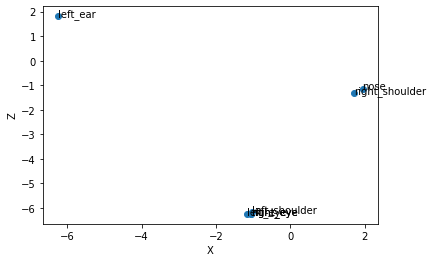

[1.8985670804977417, -1.3722506165504456, -1.2425125390291214, -6.223148703575134, -1.2425125390291214, -1.236267164349556, 1.6729733347892761]
[-1.3722506165504456, -6.221216917037964, -6.223148703575134, 1.7914123833179474, -6.223148703575134, -6.173399090766907, -1.5135395526885986]


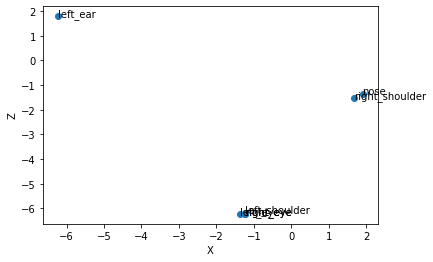

[1.8244068324565887, -1.5530778467655182, -1.3965073227882385, -6.23396635055542, -1.3965073227882385, -1.3902421295642853, 1.5826897323131561]
[-1.5530778467655182, -6.232092976570129, -6.23396635055542, 1.746671348810196, -6.23396635055542, -6.19669497013092, -1.6463997960090637]


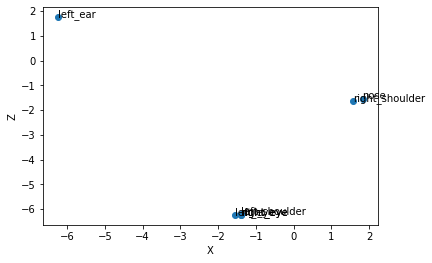

[1.8123097717761993, -1.5887218713760376, -1.4279250800609589, -6.237549185752869, -1.4279250800609589, -1.4215819537639618, 1.5703539550304413]
[-1.5887218713760376, -6.235741972923279, -6.237549185752869, 1.7430590093135834, -6.237549185752869, -6.205642223358154, -1.6764357686042786]


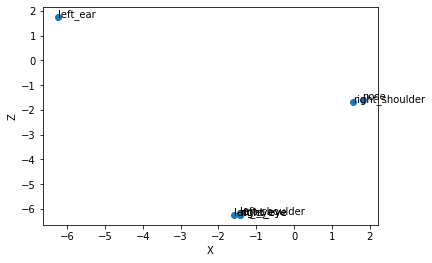

[1.805739849805832, -1.5746091306209564, -1.4152568578720093, -6.237130761146545, -1.4152568578720093, -1.4087767899036407, 1.564369797706604]
[-1.5746091306209564, -6.235326528549194, -6.237130761146545, 1.740453690290451, -6.237130761146545, -6.206682324409485, -1.6658945381641388]


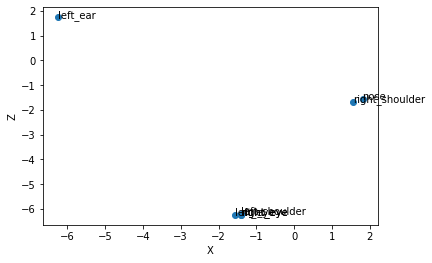

[1.8054011464118958, -1.5739805996418, -1.410323828458786, -6.2374573945999146, -1.410323828458786, -1.403857171535492, 1.5624505281448364]
[-1.5739805996418, -6.235659122467041, -6.2374573945999146, 1.7416800558567047, -6.2374573945999146, -6.209390163421631, -1.6604632139205933]


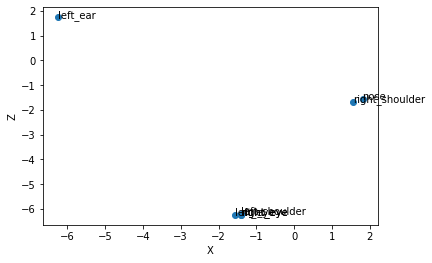

[1.8042252957820892, -1.6329191625118256, -1.4586390554904938, -6.236634254455566, -1.4586390554904938, -1.4520826935768127, 1.5611110627651215]
[-1.6329191625118256, -6.234844923019409, -6.236634254455566, 1.7434652149677277, -6.236634254455566, -6.209107041358948, -1.702636331319809]


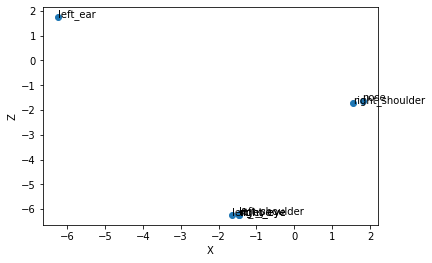

[1.7969533801078796, -1.6522014141082764, -1.471555083990097, -6.245308518409729, -1.471555083990097, -1.4649569988250732, 1.5519344806671143]
[-1.6522014141082764, -6.243550777435303, -6.245308518409729, 1.74414724111557, -6.245308518409729, -6.225869059562683, -1.7104901373386383]


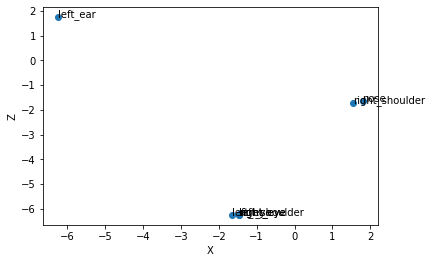

[1.798630952835083, -1.6318394243717194, -1.4575466513633728, -6.245437264442444, -1.4575466513633728, -1.450967788696289, 1.5549246966838837]
[-1.6318394243717194, -6.2437015771865845, -6.245437264442444, 1.749097853899002, -6.245437264442444, -6.22677206993103, -1.701176017522812]


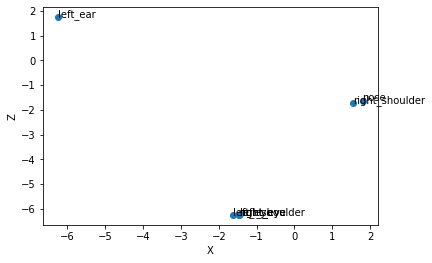

[1.7991963028907776, -1.620507389307022, -1.4475135505199432, -6.244511008262634, -1.4475135505199432, -1.4409644901752472, 1.5553945302963257]
[-1.620507389307022, -6.242784857749939, -6.244511008262634, 1.7500773072242737, -6.244511008262634, -6.226292252540588, -1.6930291056632996]


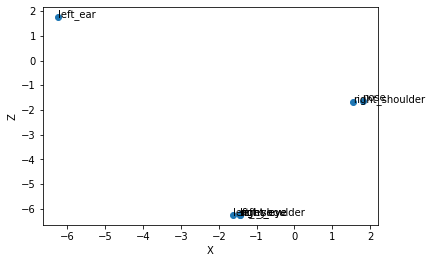

[1.8321092426776886, -1.515282541513443, -1.3523195683956146, -6.214638948440552, -1.3523195683956146, -1.3458658754825592, 1.597220003604889]
[-1.515282541513443, -6.212931871414185, -6.214638948440552, 1.7806777358055115, -6.214638948440552, -6.194986701011658, -1.6063570976257324]


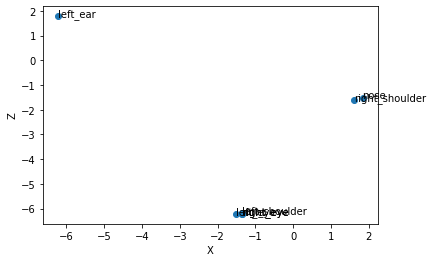

[1.8411679565906525, -1.4824606478214264, -1.3266214728355408, -6.184036135673523, -1.3266214728355408, -1.3202695548534393, 1.6122978925704956]
[-1.4824606478214264, -6.182418465614319, -6.184036135673523, 1.7889463901519775, -6.184036135673523, -6.1643630266189575, -1.5845276415348053]


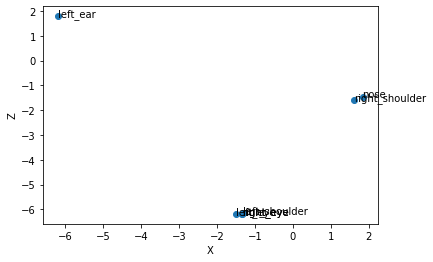

[1.8466873466968536, -1.4702731370925903, -1.317412555217743, -6.163502335548401, -1.317412555217743, -1.3111408054828644, 1.6214118897914886]
[-1.4702731370925903, -6.161944270133972, -6.163502335548401, 1.7938581109046936, -6.163502335548401, -6.1439114809036255, -1.5773555636405945]


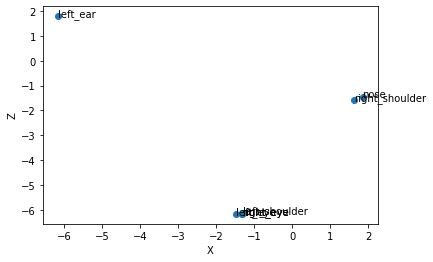

[1.8806038796901703, -1.4176055788993835, -1.2698401510715485, -6.151995658874512, -1.2698401510715485, -1.2634199857711792, 1.6578170657157898]
[-1.4176055788993835, -6.150332093238831, -6.151995658874512, 1.8193815648555756, -6.151995658874512, -6.1301106214523315, -1.535230576992035]


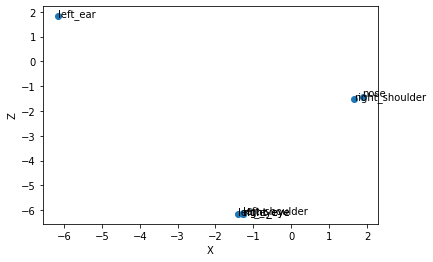

[1.8947471678256989, -1.4032456278800964, -1.2543964385986328, -6.1517250537872314, -1.2543964385986328, -1.2479149550199509, 1.6695386171340942]
[-1.4032456278800964, -6.1500465869903564, -6.1517250537872314, 1.8292711675167084, -6.1517250537872314, -6.129310727119446, -1.5196117758750916]


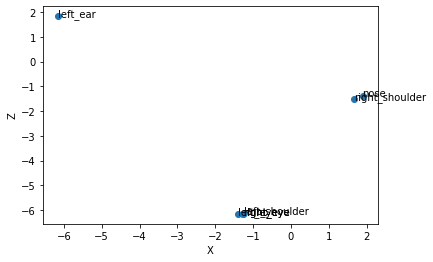

[1.8949083983898163, -1.4044435322284698, -1.2552770972251892, -6.149844527244568, -1.2552770972251892, -1.248796358704567, 1.6697478294372559]
[-1.4044435322284698, -6.148158311843872, -6.149844527244568, 1.82938814163208, -6.149844527244568, -6.127198338508606, -1.5202267467975616]


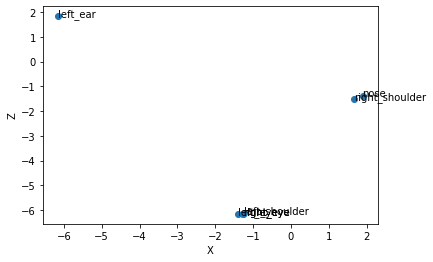

[1.9006387889385223, -1.3811053335666656, -1.2324368208646774, -6.1433809995651245, -1.2324368208646774, -1.2259123474359512, 1.6781407594680786]
[-1.3811053335666656, -6.1416929960250854, -6.1433809995651245, 1.8352510035037994, -6.1433809995651245, -6.119791269302368, -1.4964301884174347]


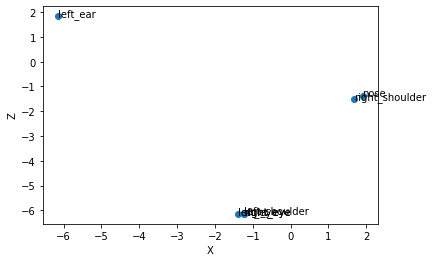

[1.9125594198703766, -1.3758239150047302, -1.2297050654888153, -6.135320663452148, -1.2297050654888153, -1.2231912463903427, 1.695864498615265]
[-1.3758239150047302, -6.133658289909363, -6.135320663452148, 1.8451443314552307, -6.135320663452148, -6.109626293182373, -1.4948365092277527]


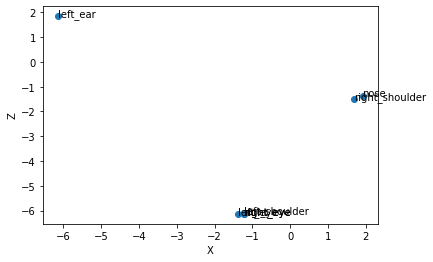

[1.9297908246517181, -1.3619081676006317, -1.2201236933469772, -6.126300692558289, -1.2201236933469772, -1.2135912477970123, 1.7193728685379028]
[-1.3619081676006317, -6.124650835990906, -6.126300692558289, 1.8594461679458618, -6.126300692558289, -6.098291873931885, -1.487877517938614]


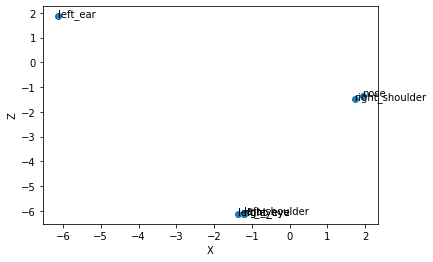

[1.9636784493923187, -1.351575255393982, -1.213170364499092, -6.111545562744141, -1.213170364499092, -1.206551119685173, 1.7557565867900848]
[-1.351575255393982, -6.1098819971084595, -6.111545562744141, 1.886426955461502, -6.111545562744141, -6.080378890037537, -1.4839527010917664]


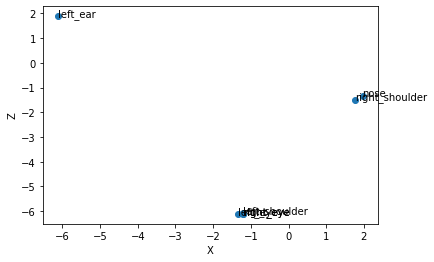

[2.001654803752899, -1.3343065977096558, -1.1998691409826279, -6.093226671218872, -1.1998691409826279, -1.193164438009262, 1.7971156537532806]
[-1.3343065977096558, -6.091551780700684, -6.093226671218872, 1.9180360436439514, -6.093226671218872, -6.058181524276733, -1.4756864309310913]


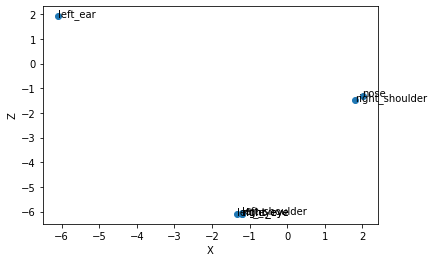

[2.0215313136577606, -1.2828357517719269, -1.1506576091051102, -6.084050536155701, -1.1506576091051102, -1.1438065767288208, 1.8173684179782867]
[-1.2828357517719269, -6.082332134246826, -6.084050536155701, 1.9336917996406555, -6.084050536155701, -6.046579480171204, -1.433175504207611]


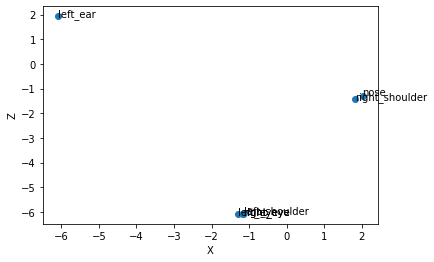

[2.0209093391895294, -1.3123761117458344, -1.1795374751091003, -6.076352000236511, -1.1795374751091003, -1.1725544184446335, 1.8154239654541016]
[-1.3123761117458344, -6.074615120887756, -6.076352000236511, 1.9352047145366669, -6.076352000236511, -6.0405272245407104, -1.4602723717689514]


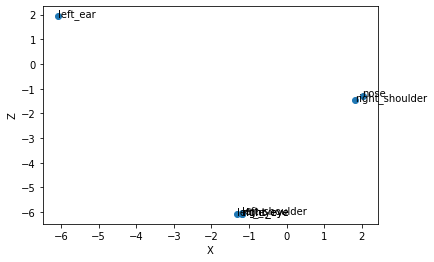

[2.0204390585422516, -1.3292457163333893, -1.196148619055748, -6.072054505348206, -1.196148619055748, -1.189136877655983, 1.8143817782402039]
[-1.3292457163333893, -6.070322394371033, -6.072054505348206, 1.9372749328613281, -6.072054505348206, -6.0375893115997314, -1.4751562476158142]


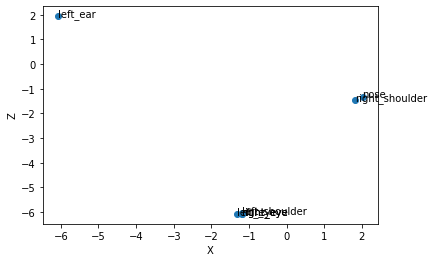

[2.074725180864334, -1.3289240002632141, -1.1967967450618744, -6.0723453760147095, -1.1967967450618744, -1.189797967672348, 1.8672223389148712]
[-1.3289240002632141, -6.070613861083984, -6.0723453760147095, 1.9767634570598602, -6.0723453760147095, -6.0375624895095825, -1.4763349294662476]


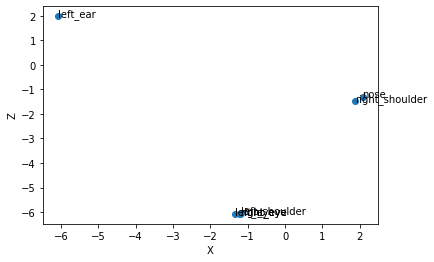

[2.0913051068782806, -1.3574676215648651, -1.2314698845148087, -6.070658564567566, -1.2314698845148087, -1.22463658452034, 1.8831774592399597]
[-1.3574676215648651, -6.068936586380005, -6.070658564567566, 1.9938215613365173, -6.070658564567566, -6.0353440046310425, -1.513047218322754]


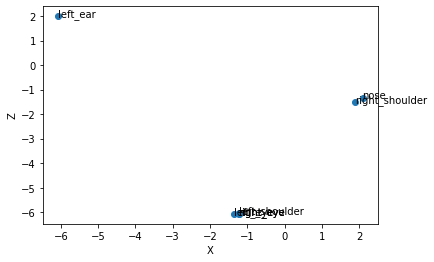

[2.123039662837982, -1.3683567941188812, -1.2439239770174026, -6.074774861335754, -1.2439239770174026, -1.2371959537267685, 1.9153271615505219]
[-1.3683567941188812, -6.073014140129089, -6.074774861335754, 2.0283690094947815, -6.074774861335754, -6.039204001426697, -1.5251074731349945]


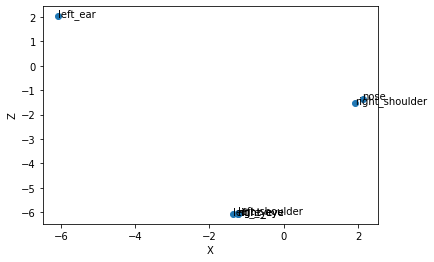

[2.118799388408661, -1.4060156047344208, -1.2816669046878815, -6.081644296646118, -1.2816669046878815, -1.2750132381916046, 1.9106024503707886]
[-1.4060156047344208, -6.079874038696289, -6.081644296646118, 2.0256732404232025, -6.081644296646118, -6.046711802482605, -1.5603800117969513]


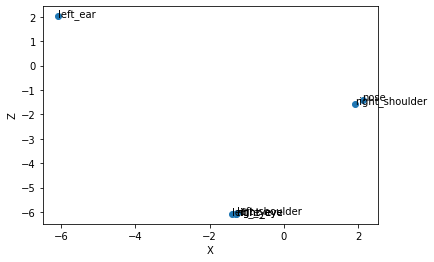

[2.1060435473918915, -1.4275334775447845, -1.3057021796703339, -6.082806587219238, -1.3057021796703339, -1.2987810373306274, 1.8995191156864166]
[-1.4275334775447845, -6.081029772758484, -6.082806587219238, 2.0118919014930725, -6.082806587219238, -6.047829985618591, -1.5861672163009644]


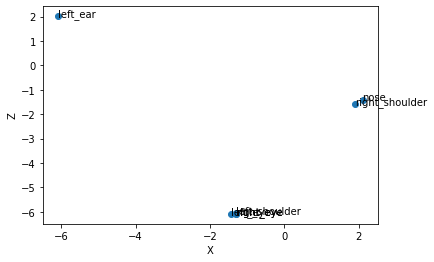

[2.086448222398758, -1.415611356496811, -1.2956996262073517, -6.086797118186951, -1.2956996262073517, -1.2886224687099457, 1.8828076124191284]
[-1.415611356496811, -6.0850536823272705, -6.086797118186951, 1.9911505281925201, -6.086797118186951, -6.051267385482788, -1.5777477622032166]


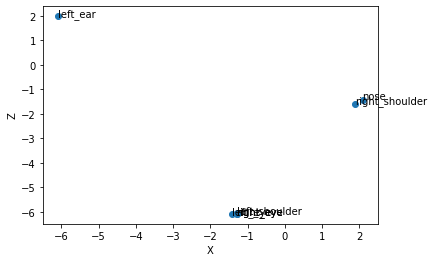

[2.06069678068161, -1.418747901916504, -1.2998810410499573, -6.086845397949219, -1.2998810410499573, -1.2927570939064026, 1.8601404130458832]
[-1.418747901916504, -6.085101366043091, -6.086845397949219, 1.96596160531044, -6.086845397949219, -6.05133056640625, -1.5824829041957855]


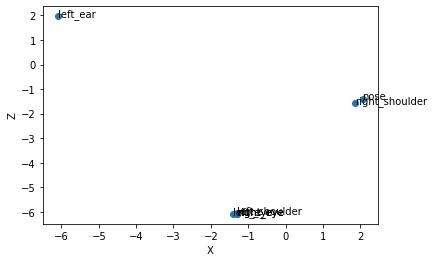

[2.013436406850815, -1.4185236394405365, -1.2996253371238708, -6.086800694465637, -1.2996253371238708, -1.2925061583518982, 1.8150250613689423]
[-1.4185236394405365, -6.08504056930542, -6.086800694465637, 1.9209195673465729, -6.086800694465637, -6.051291823387146, -1.5822407603263855]


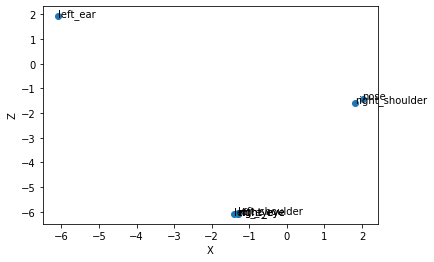

[1.9709102809429169, -1.419597864151001, -1.3007846474647522, -6.087417006492615, -1.3007846474647522, -1.2936985492706299, 1.7656844854354858]
[-1.419597864151001, -6.085634231567383, -6.087417006492615, 1.8709711730480194, -6.087417006492615, -6.051720976829529, -1.5844045579433441]


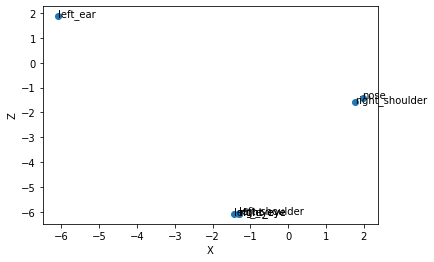

[1.867845356464386, -1.4408844709396362, -1.319703459739685, -6.0886019468307495, -1.319703459739685, -1.312546581029892, 1.660013496875763]
[-1.4408844709396362, -6.086791753768921, -6.0886019468307495, 1.7746688425540924, -6.0886019468307495, -6.0543787479400635, -1.6011372208595276]


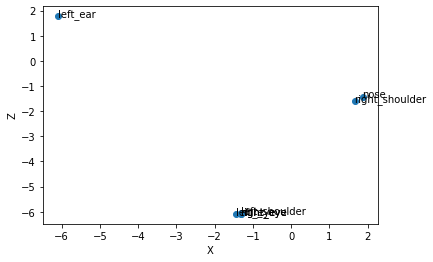

[1.783279925584793, -1.4736206829547882, -1.3452087342739105, -6.093594431877136, -1.3452087342739105, -1.3380081951618195, 1.5758563578128815]
[-1.4736206829547882, -6.0917359590530396, -6.093594431877136, 1.7049939930438995, -6.093594431877136, -6.062735319137573, -1.6213874518871307]


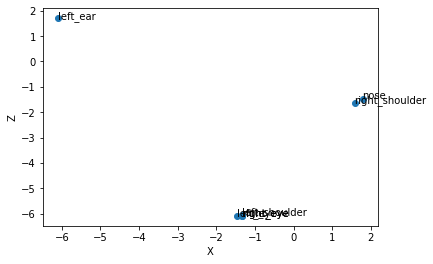

[1.7484037578105927, -1.3502508401870728, -1.21702179312706, -6.101431846618652, -1.21702179312706, -1.2096776813268661, 1.549489051103592]
[-1.3502508401870728, -6.099453568458557, -6.101431846618652, 1.672874093055725, -6.101431846618652, -6.071932315826416, -1.4949220418930054]


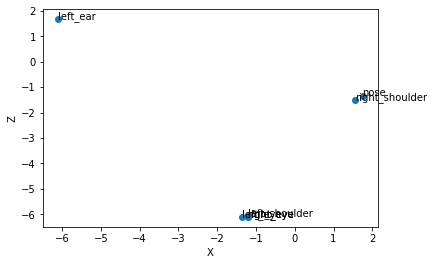

[1.723008006811142, -1.1974374949932098, -1.061340644955635, -6.113743782043457, -1.061340644955635, -1.0538548976182938, 1.53001070022583]
[-1.1974374949932098, -6.111521124839783, -6.113743782043457, 1.648760586977005, -6.113743782043457, -6.0859668254852295, -1.3390670716762543]


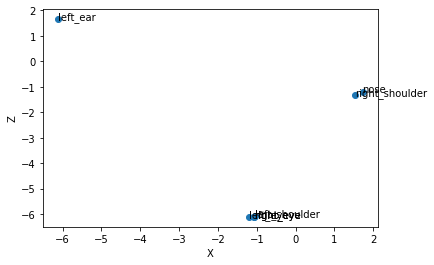

[1.7182475328445435, -1.130518764257431, -0.9881128370761871, -6.136537194252014, -0.9881128370761871, -0.9807705879211426, 1.5238916873931885]
[-1.130518764257431, -6.134019494056702, -6.136537194252014, 1.6424401104450226, -6.136537194252014, -6.109271049499512, -1.2664473056793213]


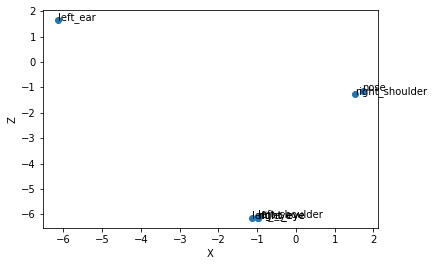

[1.7281703650951385, -1.0514923930168152, -0.9112350642681122, -6.14159882068634, -0.9112350642681122, -0.9037866443395615, 1.5333232283592224]
[-1.0514923930168152, -6.139014959335327, -6.14159882068634, 1.6511885821819305, -6.14159882068634, -6.1130595207214355, -1.1937198042869568]


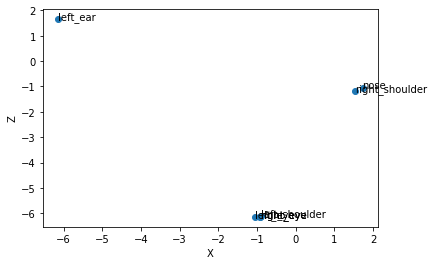

[1.73039972782135, -1.0518111288547516, -0.9117056429386139, -6.154611706733704, -0.9117056429386139, -0.9042404592037201, 1.53423011302948]
[-1.0518111288547516, -6.151980757713318, -6.154611706733704, 1.6504307091236115, -6.154611706733704, -6.1256444454193115, -1.1946254968643188]


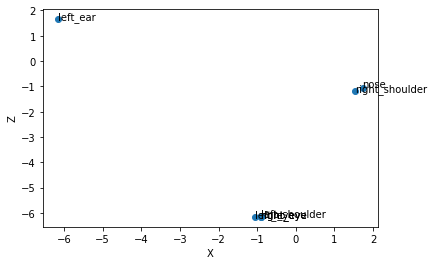

[1.7303727567195892, -1.0500502586364746, -0.9094107896089554, -6.169476509094238, -0.9094107896089554, -0.9019927680492401, 1.5305086970329285]
[-1.0500502586364746, -6.1667317152023315, -6.169476509094238, 1.643734872341156, -6.169476509094238, -6.138577461242676, -1.1959674209356308]


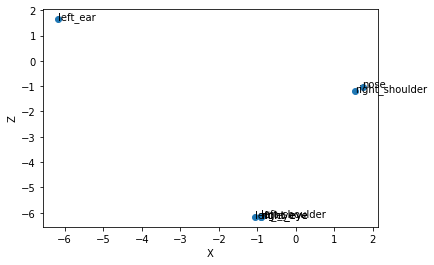

[1.7269256711006165, -1.064174473285675, -0.9244287759065628, -6.168827414512634, -0.9244287759065628, -0.9169890731573105, 1.5275712311267853]
[-1.064174473285675, -6.166051030158997, -6.168827414512634, 1.6361179947853088, -6.168827414512634, -6.1376214027404785, -1.2069671601057053]


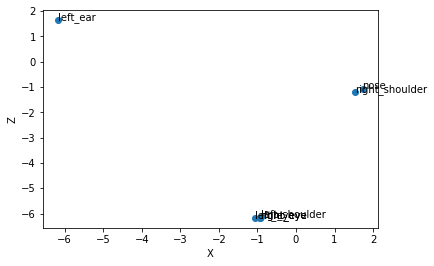

[1.7282243072986603, -1.0566415637731552, -0.9173469990491867, -6.16798996925354, -0.9173469990491867, -0.9100381284952164, 1.529981642961502]
[-1.0566415637731552, -6.165180802345276, -6.16798996925354, 1.636892408132553, -6.16798996925354, -6.1365509033203125, -1.2052830308675766]


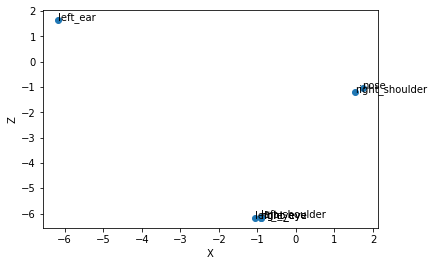

[1.7248402535915375, -1.0510045289993286, -0.9085286408662796, -6.166742444038391, -0.9085286408662796, -0.9013009071350098, 1.5278814733028412]
[-1.0510045289993286, -6.163920164108276, -6.166742444038391, 1.6316981613636017, -6.166742444038391, -6.134381890296936, -1.2001785635948181]


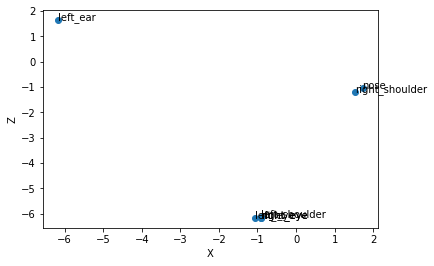

[1.7146460711956024, -0.9965428709983826, -0.8535329252481461, -6.136009097099304, -0.8535329252481461, -0.8462183922529221, 1.524830162525177]
[-0.9965428709983826, -6.133110523223877, -6.136009097099304, 1.6224737465381622, -6.136009097099304, -6.099810004234314, -1.149585247039795]


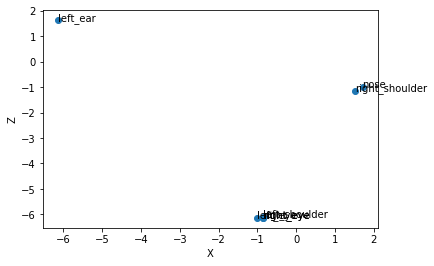

[1.71207994222641, -0.9895820915699005, -0.8477579057216644, -6.1108434200286865, -0.8477579057216644, -0.8404728025197983, 1.525169163942337]
[-0.9895820915699005, -6.1078304052352905, -6.1108434200286865, 1.6187821328639984, -6.1108434200286865, -6.068741083145142, -1.149478480219841]


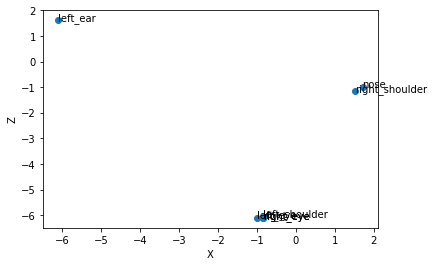

[1.70896515250206, -0.9197014570236206, -0.7777328789234161, -6.104256510734558, -0.7777328789234161, -0.7704221457242966, 1.525079607963562]
[-0.9197014570236206, -6.10119104385376, -6.104256510734558, 1.61600723862648, -6.104256510734558, -6.061382293701172, -1.0834439843893051]


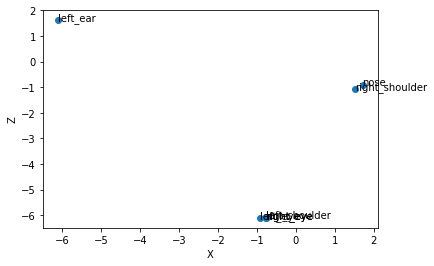

[1.7082825303077698, -0.8633028715848923, -0.7249388098716736, -6.091996431350708, -0.7249388098716736, -0.7176082581281662, 1.5257582068443298]
[-0.8633028715848923, -6.088835000991821, -6.091996431350708, 1.6160410642623901, -6.091996431350708, -6.04807436466217, -1.036512851715088]


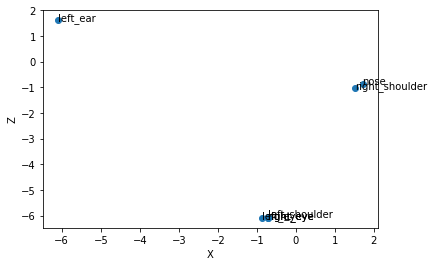

[1.7087478935718536, -0.7749748975038528, -0.6399483978748322, -6.0650694370269775, -0.6399483978748322, -0.6326828151941299, 1.5307146310806274]
[-0.7749748975038528, -6.061842441558838, -6.0650694370269775, 1.6165435314178467, -6.0650694370269775, -6.019126772880554, -0.9572368115186691]


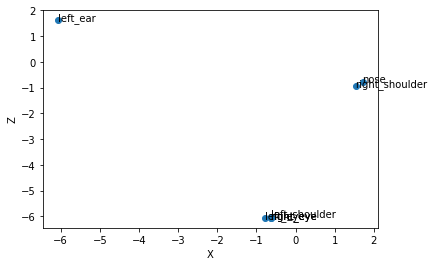

[1.7067347466945648, -0.6807290017604828, -0.5470560863614082, -6.047388911247253, -0.5470560863614082, -0.5400995537638664, 1.532023549079895]
[-0.6807290017604828, -6.044170260429382, -6.047388911247253, 1.61614328622818, -6.047388911247253, -5.999848246574402, -0.86668461561203]


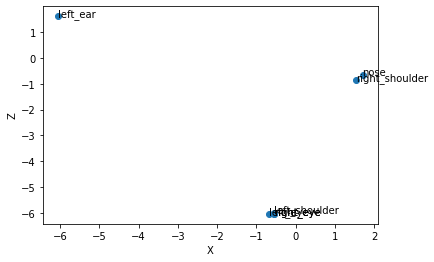

[1.6867923736572266, -0.5917574092745781, -0.4524538293480873, -6.027404069900513, -0.4524538293480873, -0.44603053480386734, 1.5276823937892914]
[-0.5917574092745781, -6.024221777915955, -6.027404069900513, 1.6063855588436127, -6.027404069900513, -5.982285737991333, -0.7660753279924393]


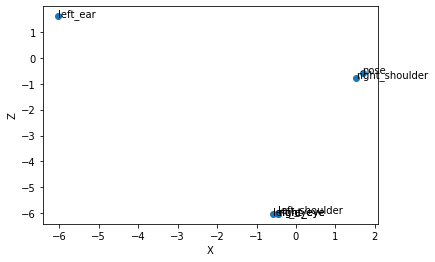

[1.6625837981700897, -0.5184772983193398, -0.3768647089600563, -6.003263592720032, -0.3768647089600563, -0.37095852196216583, 1.5176257491111755]
[-0.5184772983193398, -6.000190377235413, -6.003263592720032, 1.590798944234848, -6.003263592720032, -5.95989465713501, -0.6874833256006241]


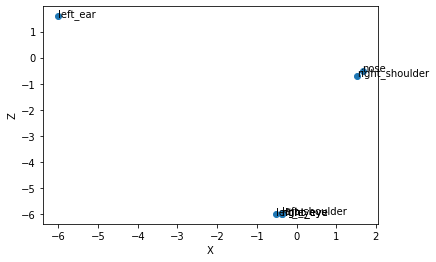

[1.6469110548496246, -0.4659653827548027, -0.32280948013067245, -5.982380509376526, -0.32280948013067245, -0.31689781695604324, 1.5105532109737396]
[-0.4659653827548027, -5.979408025741577, -5.982380509376526, 1.5795385837554932, -5.982380509376526, -5.9393322467803955, -0.6322437524795532]


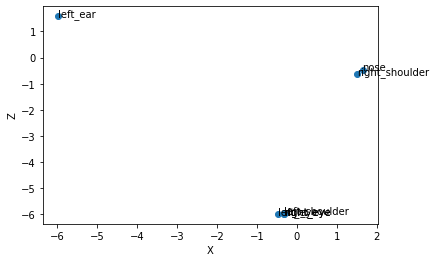

[1.6467751562595367, -0.4067353531718254, -0.26550138369202614, -5.972065329551697, -0.26550138369202614, -0.2595941349864006, 1.5108820796012878]
[-0.4067353531718254, -5.969142913818359, -5.972065329551697, 1.5790753066539764, -5.972065329551697, -5.926963686943054, -0.5781718343496323]


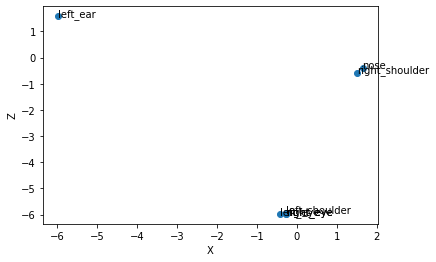

[1.6646027565002441, -0.40320951491594315, -0.2597616985440254, -5.95820426940918, -0.2597616985440254, -0.2534831687808037, 1.5321685373783112]
[-0.40320951491594315, -5.955366492271423, -5.95820426940918, 1.5957176685333252, -5.95820426940918, -5.9103453159332275, -0.5725587904453278]


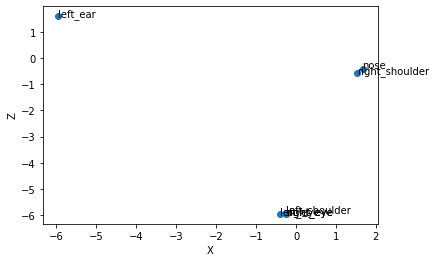

[1.677706092596054, -0.3485073521733284, -0.20468879491090775, -5.957662463188171, -0.20468879491090775, -0.19815539941191673, 1.5454420447349548]
[-0.3485073521733284, -5.954878330230713, -5.957662463188171, 1.605621874332428, -5.957662463188171, -5.908270478248596, -0.5203332751989365]


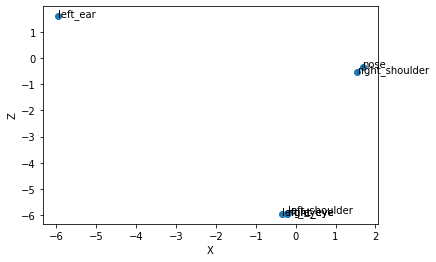

[1.7030620574951172, -0.3267376869916916, -0.187001284211874, -5.9585511684417725, -0.187001284211874, -0.18041366711258888, 1.5706856548786163]
[-0.3267376869916916, -5.955825448036194, -5.9585511684417725, 1.6244465112686157, -5.9585511684417725, -5.909638404846191, -0.505269430577755]


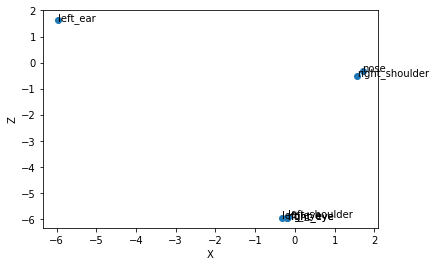

[1.7252728343009949, -0.3316063806414604, -0.19371269270777702, -5.964796543121338, -0.19371269270777702, -0.18723545596003532, 1.5910214185714722]
[-0.3316063806414604, -5.962231755256653, -5.964796543121338, 1.6417738795280457, -5.964796543121338, -5.912858247756958, -0.513308010995388]


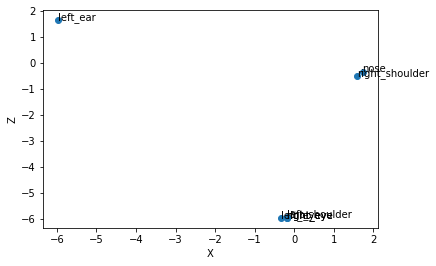

[1.7322124540805817, -0.29733287170529366, -0.1589919999241829, -5.967164039611816, -0.1589919999241829, -0.15276683494448662, 1.5968506038188934]
[-0.29733287170529366, -5.96470832824707, -5.967164039611816, 1.6485251486301422, -5.967164039611816, -5.914168357849121, -0.4795588552951813]


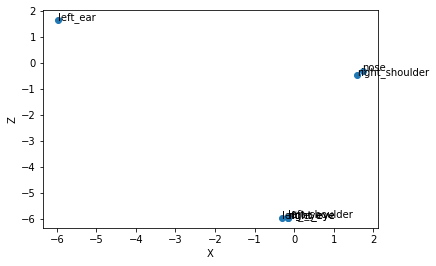

[1.7320506274700165, -0.3155515715479851, -0.17657509073615074, -5.994859933853149, -0.17657509073615074, -0.17034178599715233, 1.5940025448799133]
[-0.3155515715479851, -5.992790460586548, -5.994859933853149, 1.6478660702705383, -5.994859933853149, -5.938183665275574, -0.4959334060549736]


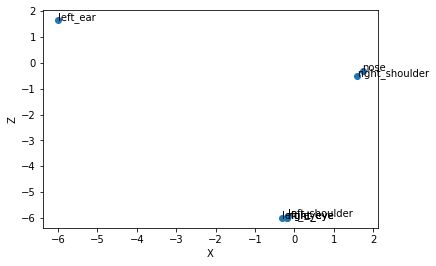

[1.7343102395534515, -0.3503056615591049, -0.21093085408210754, -6.040703654289246, -0.21093085408210754, -0.20478731021285057, 1.593191921710968]
[-0.3503056615591049, -6.038833260536194, -6.040703654289246, 1.6481079161167145, -6.040703654289246, -5.981380939483643, -0.5305635929107666]


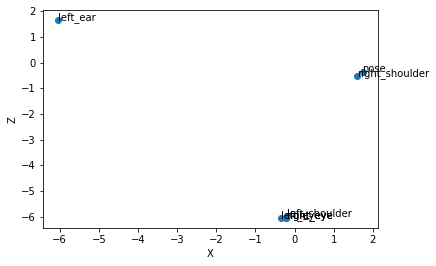

[1.734117865562439, -0.35231612622737885, -0.2123861201107502, -6.051990389823914, -0.2123861201107502, -0.20639879629015923, 1.592867374420166]
[-0.35231612622737885, -6.0502690076828, -6.051990389823914, 1.6481459140777588, -6.051990389823914, -5.992069244384766, -0.5320146307349205]


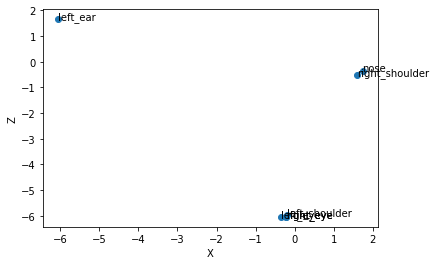

[1.734151542186737, -0.3498447313904762, -0.20968899130821228, -6.052968502044678, -0.20968899130821228, -0.20390981808304787, 1.5916156768798828]
[-0.3498447313904762, -6.051210165023804, -6.052968502044678, 1.647668182849884, -6.052968502044678, -5.992878675460815, -0.5294255539774895]


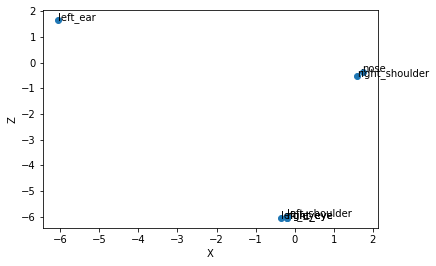

[1.7337915301322937, -0.34730974584817886, -0.20922299474477768, -6.052751541137695, -0.20922299474477768, -0.2035372331738472, 1.5891976654529572]
[-0.34730974584817886, -6.050981283187866, -6.052751541137695, 1.6452184319496155, -6.052751541137695, -5.992736220359802, -0.5288360267877579]


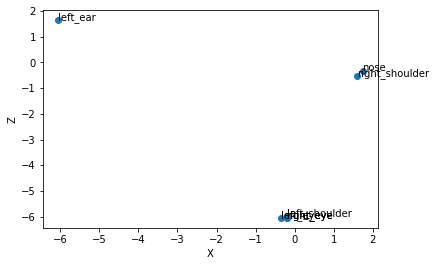

[1.7103733122348785, -0.36255888640880585, -0.22717008367180824, -6.052650809288025, -0.22717008367180824, -0.2216712199151516, 1.5546230971813202]
[-0.36255888640880585, -6.050870418548584, -6.052650809288025, 1.6140620410442352, -6.052650809288025, -5.992618203163147, -0.5478626862168312]


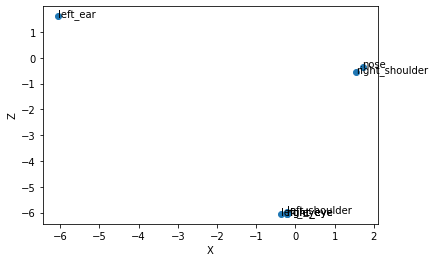

[1.6623079776763916, -0.364038310945034, -0.2290244959294796, -6.053988337516785, -0.2290244959294796, -0.2235441468656063, 1.5023088455200195]
[-0.364038310945034, -6.052219271659851, -6.053988337516785, 1.5605294704437256, -6.053988337516785, -5.993692874908447, -0.5508431792259216]


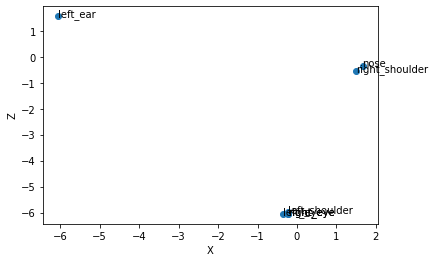

[1.6353556513786316, -0.36579351872205734, -0.23087618872523308, -6.053907871246338, -0.23087618872523308, -0.2254439890384674, 1.4844992756843567]
[-0.36579351872205734, -6.052127480506897, -6.053907871246338, 1.5341901779174805, -6.053907871246338, -5.993625521659851, -0.5554436519742012]


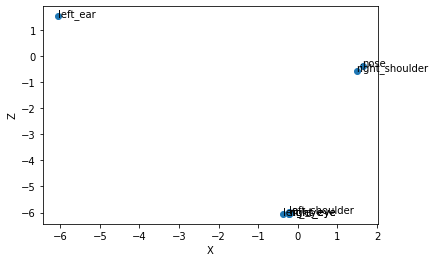

[1.6312718391418457, -0.36746177822351456, -0.23250099271535873, -6.0544902086257935, -0.23250099271535873, -0.2271343395113945, 1.4828206598758698]
[-0.36746177822351456, -6.0526978969573975, -6.0544902086257935, 1.5282149612903595, -6.0544902086257935, -5.993950963020325, -0.5598033964633942]


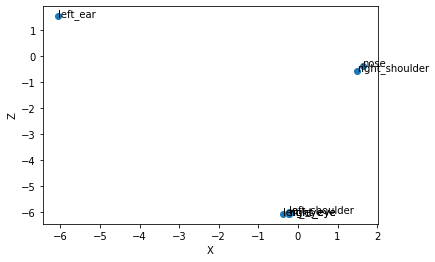

[1.6260384023189545, -0.31939391046762466, -0.18928835168480873, -6.054330468177795, -0.18928835168480873, -0.18404202535748482, 1.480296403169632]
[-0.31939391046762466, -6.052548885345459, -6.054330468177795, 1.5214291214942932, -6.054330468177795, -5.99364697933197, -0.5213409289717674]


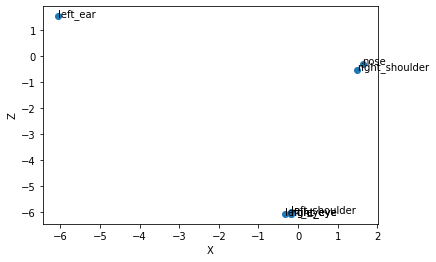

[1.6129323840141296, -0.33090032637119293, -0.20726580172777176, -6.100388169288635, -0.20726580172777176, -0.2019067294895649, 1.4640453457832336]
[-0.33090032637119293, -6.0986775159835815, -6.100388169288635, 1.5026338398456573, -6.100388169288635, -6.041036248207092, -0.5386195331811905]


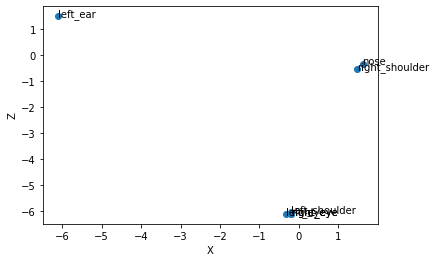

[1.5801547467708588, -0.34999657422304153, -0.23299723863601685, -6.134206056594849, -0.23299723863601685, -0.22710688412189484, 1.4307709038257599]
[-0.34999657422304153, -6.13261342048645, -6.134206056594849, 1.4679451286792755, -6.134206056594849, -6.0756915807724, -0.5627975612878799]


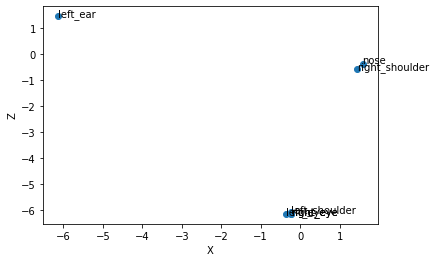

[1.574990302324295, -0.4106210172176361, -0.3003387339413166, -6.147467494010925, -0.3003387339413166, -0.2943507395684719, 1.4234179258346558]
[-0.4106210172176361, -6.14577054977417, -6.147467494010925, 1.4621953666210175, -6.147467494010925, -6.091728210449219, -0.6263947486877441]


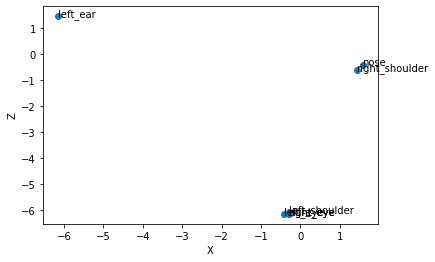

[1.5743398666381836, -0.39601605385541916, -0.28488248586654663, -6.145097613334656, -0.28488248586654663, -0.27893831953406334, 1.4246824383735657]
[-0.39601605385541916, -6.143450736999512, -6.145097613334656, 1.4630112051963806, -6.145097613334656, -6.089875102043152, -0.6095745414495468]


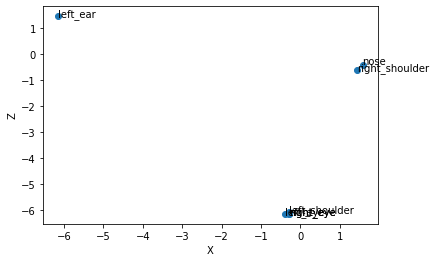

[1.5660801529884338, -0.3642892464995384, -0.25561871007084846, -6.16346001625061, -0.25561871007084846, -0.24933382868766785, 1.416628509759903]
[-0.3642892464995384, -6.1620014905929565, -6.16346001625061, 1.4525200426578522, -6.16346001625061, -6.106672286987305, -0.5786659941077232]


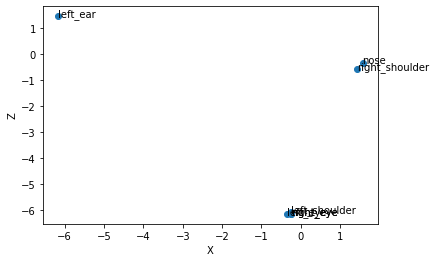

[1.560770720243454, -0.3647960349917412, -0.2555162273347378, -6.166161894798279, -0.2555162273347378, -0.24922844022512436, 1.4121244847774506]
[-0.3647960349917412, -6.164827346801758, -6.166161894798279, 1.4499102532863617, -6.166161894798279, -6.109977960586548, -0.5779227986931801]


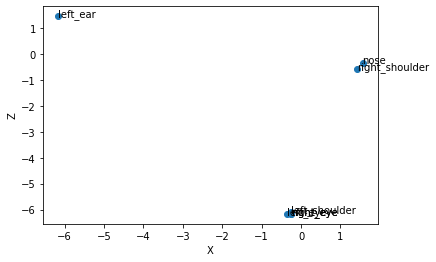

[1.6030727326869965, -0.3647567331790924, -0.2555128000676632, -6.173920631408691, -0.2555128000676632, -0.2491813711822033, 1.4509262144565582]
[-0.3647567331790924, -6.172478795051575, -6.173920631408691, 1.4847074449062347, -6.173920631408691, -6.117274165153503, -0.5776727199554443]


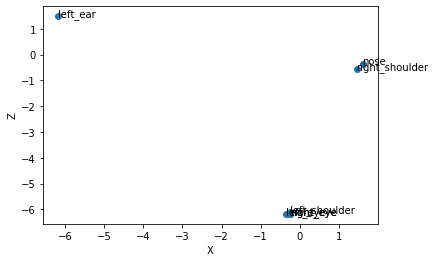

[1.6126297414302826, -0.43980930000543594, -0.33444035798311234, -6.193732023239136, -0.33444035798311234, -0.3272857889533043, 1.4571788907051086]
[-0.43980930000543594, -6.192278861999512, -6.193732023239136, 1.493128389120102, -6.193732023239136, -6.136601567268372, -0.6496592611074448]


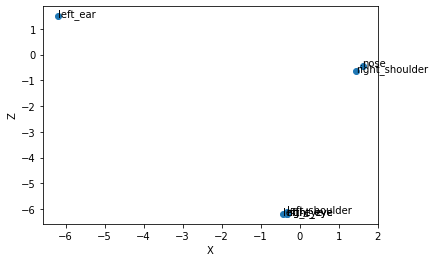

[1.5998531877994537, -0.49143414944410324, -0.38809794932603836, -6.192408800125122, -0.38809794932603836, -0.3802242875099182, 1.4452728629112244]
[-0.49143414944410324, -6.190930604934692, -6.192408800125122, 1.4833351969718933, -6.192408800125122, -6.135188937187195, -0.6986193358898163]


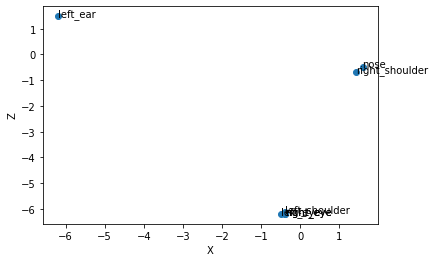

[1.6441506147384644, -0.4151034355163574, -0.31172214075922966, -6.191759705543518, -0.31172214075922966, -0.30308257788419724, 1.4998231828212738]
[-0.4151034355163574, -6.190312504768372, -6.191759705543518, 1.5276764333248138, -6.191759705543518, -6.133601665496826, -0.6236406788229942]


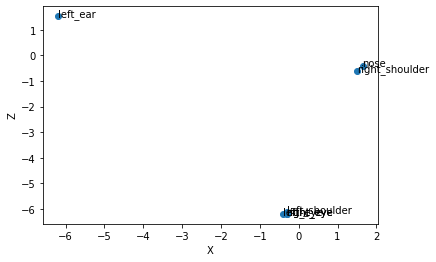

[1.7214486002922058, -0.4675810784101486, -0.3653862327337265, -6.19911253452301, -0.3653862327337265, -0.3568848967552185, 1.565300077199936]
[-0.4675810784101486, -6.197547912597656, -6.19911253452301, 1.597743034362793, -6.19911253452301, -6.139693260192871, -0.6766960769891739]


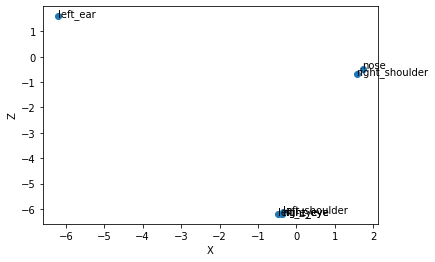

[1.7900624871253967, -0.4690655693411827, -0.3665301948785782, -6.200520396232605, -0.3665301948785782, -0.35806018859148026, 1.632891297340393]
[-0.4690655693411827, -6.198834776878357, -6.200520396232605, 1.6655324399471283, -6.200520396232605, -6.140644550323486, -0.6775732338428497]


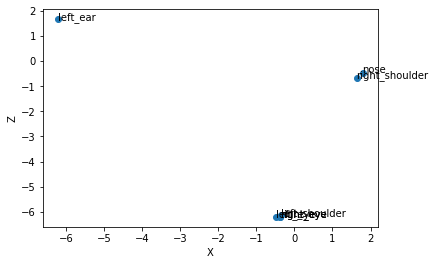

[1.8541556596755981, -0.4384324327111244, -0.33516913652420044, -6.19992733001709, -0.33516913652420044, -0.32644160091876984, 1.7021289467811584]
[-0.4384324327111244, -6.198228597640991, -6.19992733001709, 1.733592301607132, -6.19992733001709, -6.140043139457703, -0.6495226919651031]


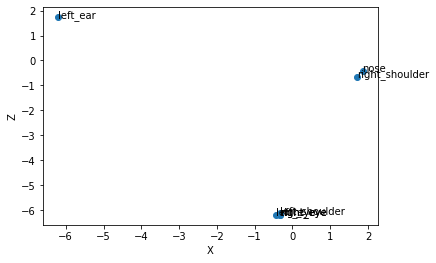

[1.8791525065898895, -0.42673494666814804, -0.32372675836086273, -6.174536943435669, -0.32372675836086273, -0.31493764370679855, 1.7375852167606354]
[-0.42673494666814804, -6.172678470611572, -6.174536943435669, 1.768147051334381, -6.174536943435669, -6.111447215080261, -0.6396470963954926]


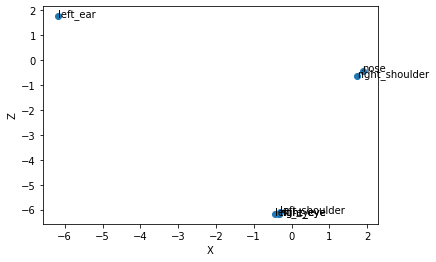

[1.8935205042362213, -0.42945902794599533, -0.3264094144105911, -6.166035532951355, -0.3264094144105911, -0.3176959231495857, 1.756855696439743]
[-0.42945902794599533, -6.1640578508377075, -6.166035532951355, 1.787390261888504, -6.166035532951355, -6.101093292236328, -0.6427344679832458]


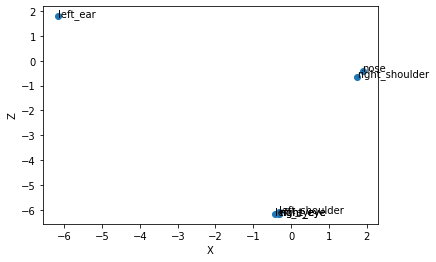

[1.9133423268795013, -0.5312977731227875, -0.43036382645368576, -6.02202296257019, -0.43036382645368576, -0.42260050773620605, 1.781112551689148]
[-0.5312977731227875, -6.020048260688782, -6.02202296257019, 1.815657913684845, -6.02202296257019, -5.964053273200989, -0.7492899894714355]


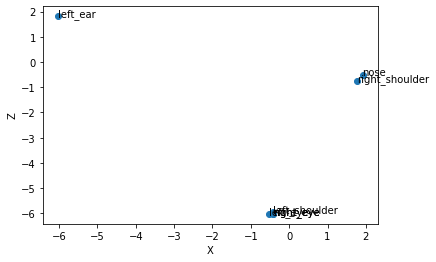

[1.9276586174964905, -0.5811338126659393, -0.4823338985443115, -5.970621109008789, -0.4823338985443115, -0.47487422823905945, 1.796712577342987]
[-0.5811338126659393, -5.968648791313171, -5.970621109008789, 1.8317103385925293, -5.970621109008789, -5.913580060005188, -0.8023667335510254]


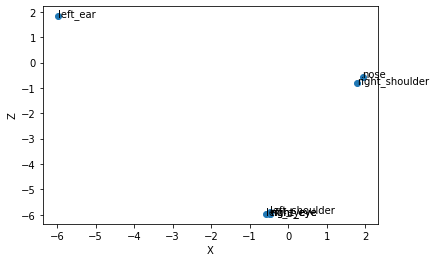

[1.9389937818050385, -0.630829930305481, -0.5345472693443298, -5.937846302986145, -0.5345472693443298, -0.5272943526506424, 1.8074361979961395]
[-0.630829930305481, -5.935854911804199, -5.937846302986145, 1.843227595090866, -5.937846302986145, -5.8802491426467896, -0.8563261479139328]


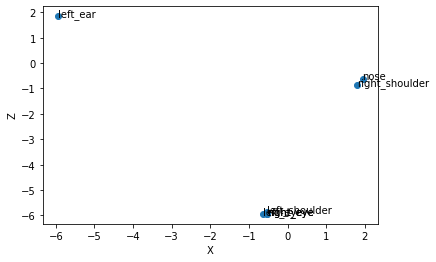

[1.9389672577381134, -0.6391024589538574, -0.5412581562995911, -5.942419767379761, -0.5412581562995911, -0.5340104550123215, 1.804855763912201]
[-0.6391024589538574, -5.940379500389099, -5.942419767379761, 1.841427981853485, -5.942419767379761, -5.885012149810791, -0.8630751818418503]


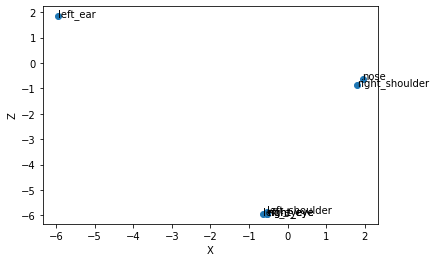

[1.938486248254776, -0.63184455037117, -0.5331927910447121, -5.946202278137207, -0.5331927910447121, -0.5259200558066368, 1.803203672170639]
[-0.63184455037117, -5.944122076034546, -5.946202278137207, 1.8398068845272064, -5.946202278137207, -5.888798832893372, -0.8546563237905502]


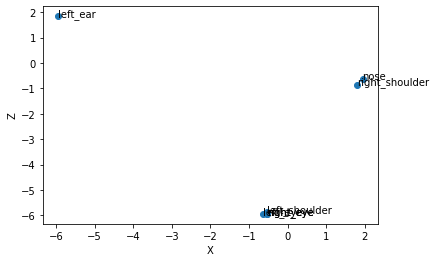

[1.9391103088855743, -0.6395545601844788, -0.5381741374731064, -5.951793789863586, -0.5381741374731064, -0.5310111865401268, 1.8004123866558075]
[-0.6395545601844788, -5.949720144271851, -5.951793789863586, 1.838582456111908, -5.951793789863586, -5.893990397453308, -0.8592378348112106]


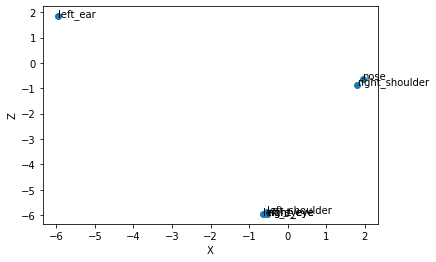

[1.936793327331543, -0.6590388715267181, -0.5579905956983566, -5.955864787101746, -0.5579905956983566, -0.5508141964673996, 1.7977023124694824]
[-0.6590388715267181, -5.95378577709198, -5.955864787101746, 1.8358951807022095, -5.955864787101746, -5.8981239795684814, -0.8774666488170624]


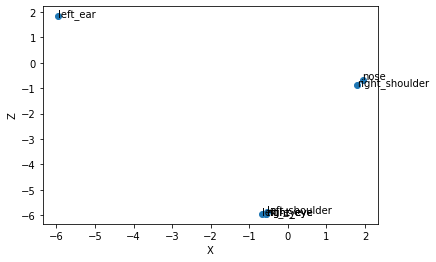

[1.9352619349956512, -0.8348191529512405, -0.7365162670612335, -5.968306064605713, -0.7365162670612335, -0.729413777589798, 1.794498860836029]
[-0.8348191529512405, -5.966238379478455, -5.968306064605713, 1.8338324129581451, -5.968306064605713, -5.913325548171997, -1.048985794186592]


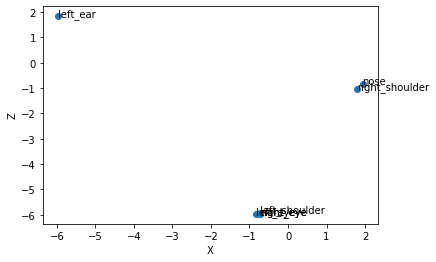

[1.8943162262439728, -0.8392259478569031, -0.7411061227321625, -5.991225838661194, -0.7411061227321625, -0.7339133322238922, 1.7461605370044708]
[-0.8392259478569031, -5.989208221435547, -5.991225838661194, 1.796276867389679, -5.991225838661194, -5.937135219573975, -1.0527276247739792]


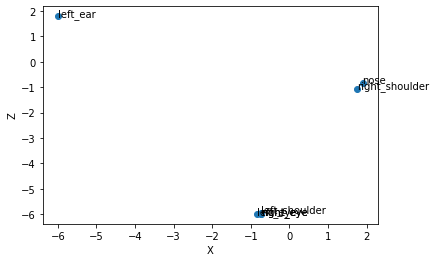

[1.880819946527481, -0.8224838972091675, -0.7247132807970047, -6.010434031486511, -0.7247132807970047, -0.7174137234687805, 1.7313331365585327]
[-0.8224838972091675, -6.008465886116028, -6.010434031486511, 1.7804065346717834, -6.010434031486511, -5.9553903341293335, -1.036938726902008]


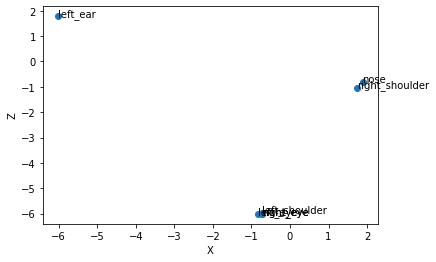

[1.8811197578907013, -0.8114057779312134, -0.7138530910015106, -6.03293776512146, -0.7138530910015106, -0.7065124064683914, 1.7314635217189789]
[-0.8114057779312134, -6.031063795089722, -6.03293776512146, 1.7801912128925323, -6.03293776512146, -5.975521802902222, -1.0270198434591293]


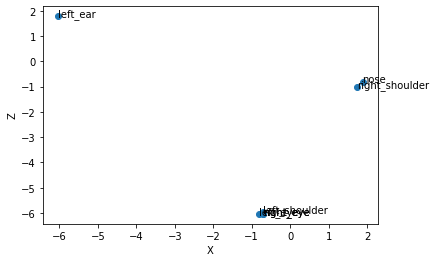

[1.8809612095355988, -0.8409076929092407, -0.7464788854122162, -6.046597361564636, -0.7464788854122162, -0.7393161952495575, 1.7313729226589203]
[-0.8409076929092407, -6.044967174530029, -6.046597361564636, 1.7795228958129883, -6.046597361564636, -5.987638235092163, -1.0596463084220886]


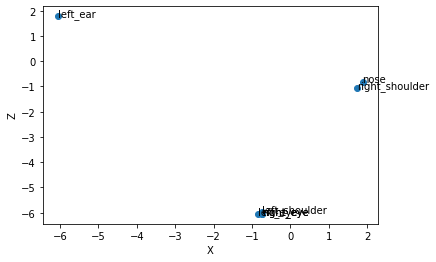

[1.8951065838336945, -0.8467358350753784, -0.75360007584095, -6.048554182052612, -0.75360007584095, -0.7465153187513351, 1.7478878796100616]
[-0.8467358350753784, -6.047033667564392, -6.048554182052612, 1.792253851890564, -6.048554182052612, -5.989178419113159, -1.0666213929653168]


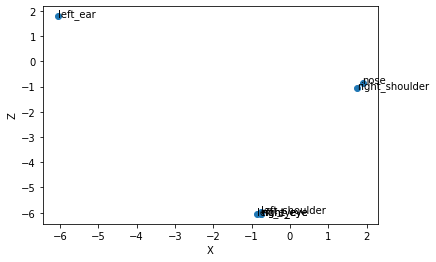

[1.9228896498680115, -0.8649882674217224, -0.7732467353343964, -6.054922938346863, -0.7732467353343964, -0.7662142068147659, 1.776977926492691]
[-0.8649882674217224, -6.053576469421387, -6.054922938346863, 1.8187110126018524, -6.054922938346863, -5.995153188705444, -1.0850279778242111]


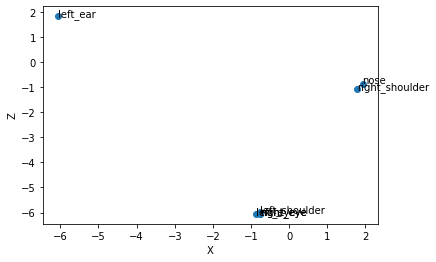

[1.9420291483402252, -0.8645695447921753, -0.7717709988355637, -6.070335507392883, -0.7717709988355637, -0.7647750526666641, 1.7912635207176208]
[-0.8645695447921753, -6.069234013557434, -6.070335507392883, 1.8336381018161774, -6.070335507392883, -6.010603904724121, -1.0836664587259293]


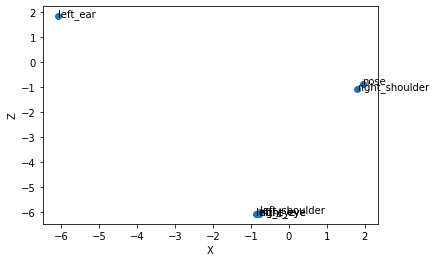

[1.9440853595733643, -0.9864411503076553, -0.8900929242372513, -6.084031462669373, -0.8900929242372513, -0.8831271529197693, 1.7917011678218842]
[-0.9864411503076553, -6.082990765571594, -6.084031462669373, 1.8378455936908722, -6.084031462669373, -6.027998328208923, -1.195351928472519]


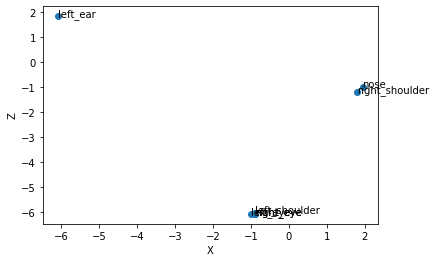

[1.951703280210495, -1.0025765746831894, -0.9043329209089279, -6.0971856117248535, -0.9043329209089279, -0.8973079174757004, 1.7972320318222046]
[-1.0025765746831894, -6.096175909042358, -6.0971856117248535, 1.8486422300338745, -6.0971856117248535, -6.043976545333862, -1.2076092511415482]


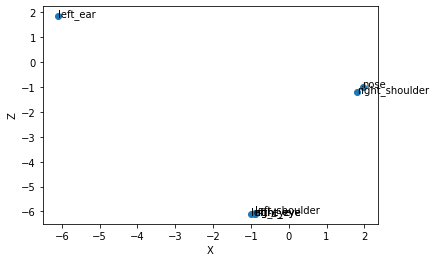

[1.9494159519672394, -0.9932570904493332, -0.8953272551298141, -6.065504550933838, -0.8953272551298141, -0.8882459253072739, 1.7969532310962677]
[-0.9932570904493332, -6.064542531967163, -6.065504550933838, 1.8495199084281921, -6.065504550933838, -6.016796231269836, -1.1987961828708649]


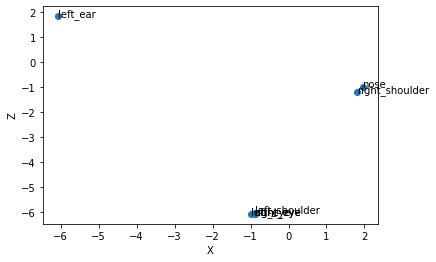

In [18]:
for k in range(138):
    side_view = point_normalize_dataframe.loc[k]
    check_angle_side_x = []
    check_angle_side_z = []

    plot_for_point = [nose, left_eye, right_eye, left_ear, right_eye, left_shoulder, right_shoulder]

    for i in plot_for_point:
        #print(i)
    
        check_angle_side_x.append(side_view[i] * 10)
        check_angle_side_z.append(side_view[i+2] * 10)
    print(check_angle_side_x)
    print(check_angle_side_z)

    plt.scatter(check_angle_side_x, check_angle_side_z)
    
    idx = 0

    for i in plot_for_point:
        name = landmark_names[i]
        plt.xlabel("X")
        plt.ylabel("Z")
        plt.text(check_angle_side_x[idx], check_angle_side_z[idx], name, fontdict={"size" : 10})
        idx = idx + 1
    plt.show()

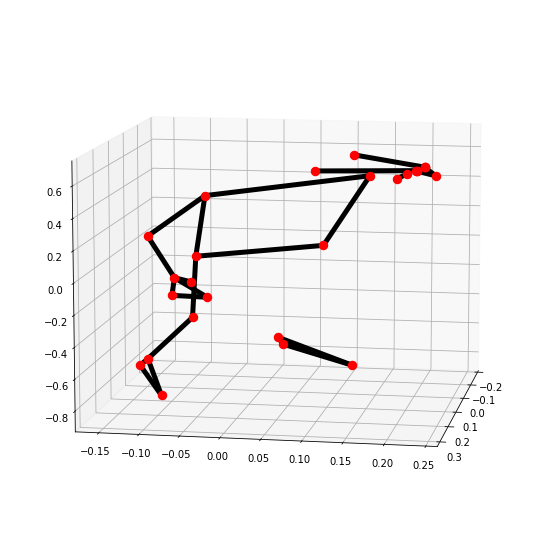

In [19]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)